# Lab 4: Working with 'real' data
## Introduction

In this lab we are going to work on how to estimate the background from 'real' data. Real is in air quotes because the data is actually from simplified simulations to make the problems manageable in a single lab. But the data will have some features that resemble that of real data sets.

## Getting data and HD5
In general exchanging raw data is a pain. Writing data in text files is error prone, inaccurate, and wastes space, but raw binary files have all sorts of subtleties too (including the internal byte order of your processor). To try and sidestep a whole set of nasty issues, we are going to use HDF5 (originally developed by the National Center for Supercomputing Applications for data exchange) to allow everyone to import the data.

**The code below imports the data needed for this lab to the cloud Python server.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.optimize import curve_fit

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
mpl.rcParams['agg.path.chunksize'] = 10000.

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data')) #store data from the file to an array
hf.close() #close file

## Problem  1

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

**1)** The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. 

#### **Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().**

First all, let's try the scatterplot of time vs. solar phase. Because of the huge size of data, it will be time-consuming to include all of them. Let's choose our data to be every 10kth data from the original vector.

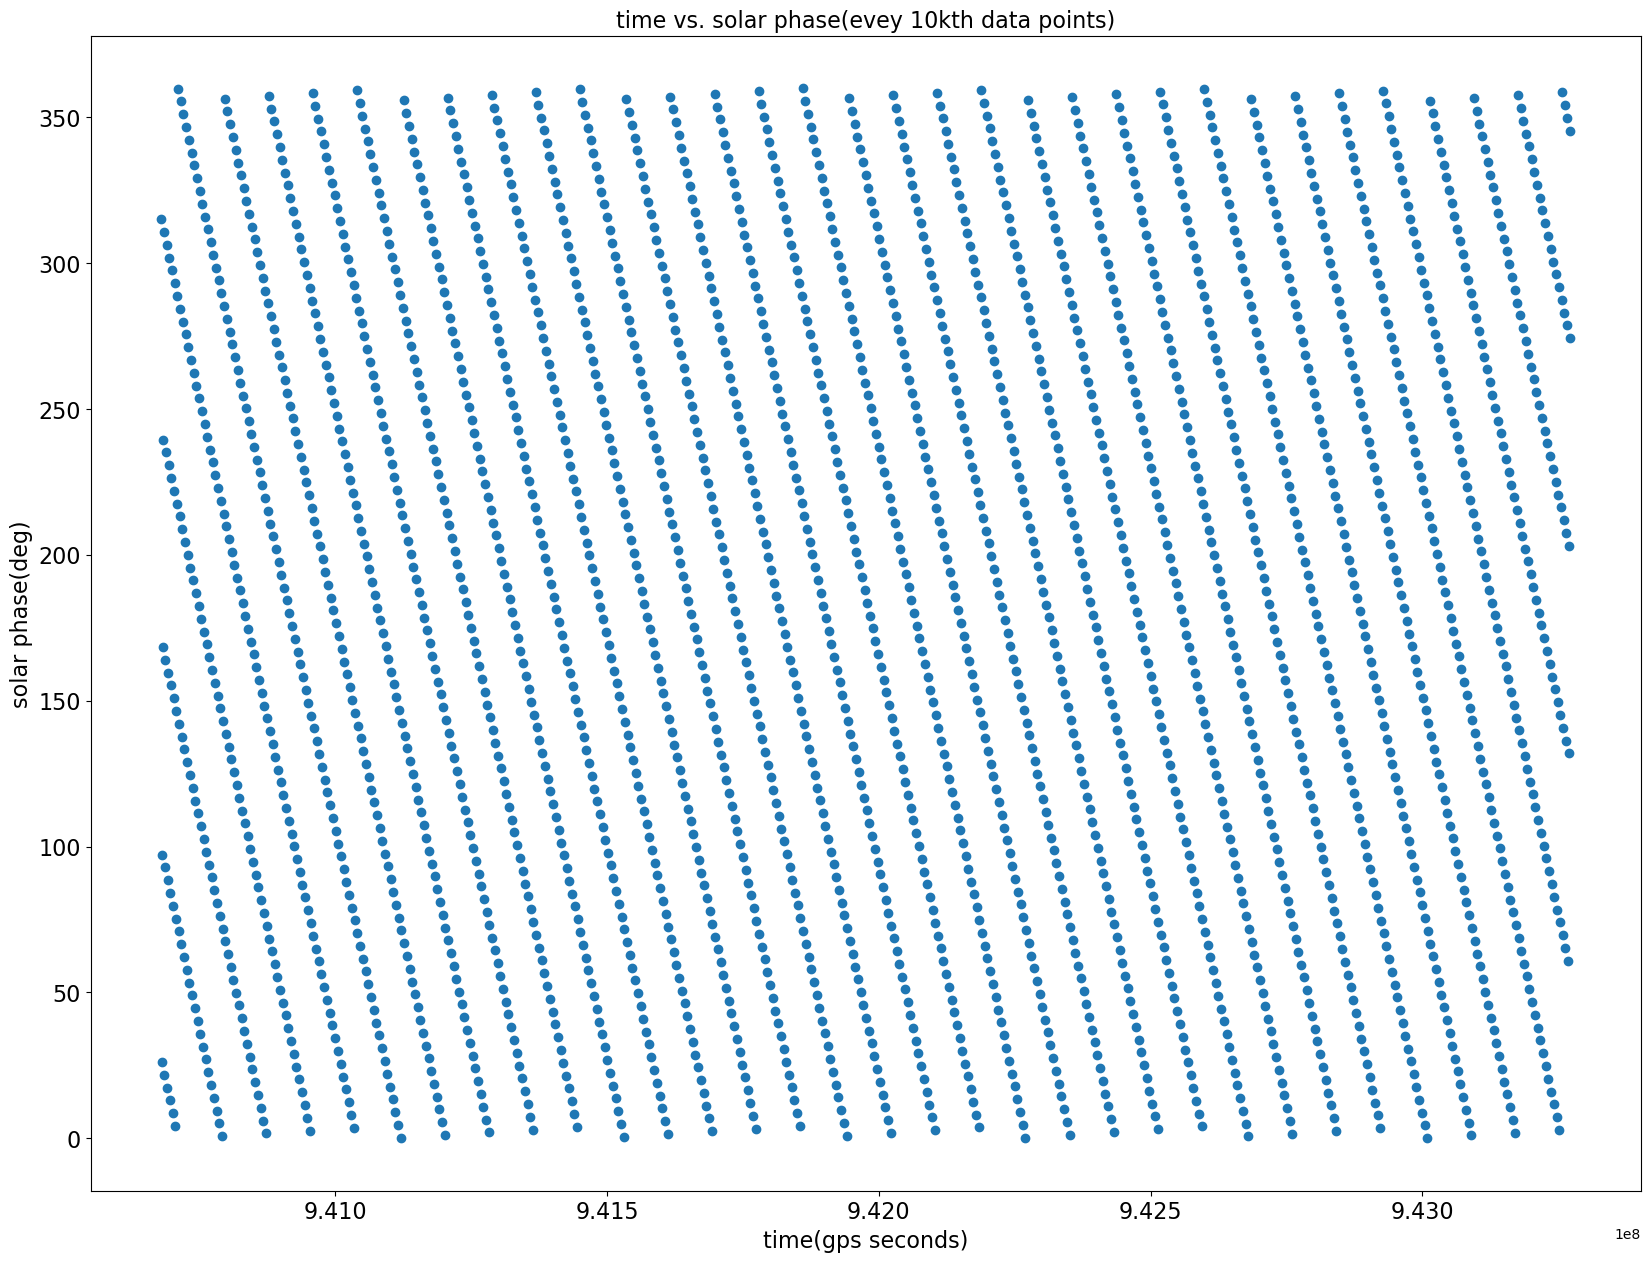

In [3]:
plt.plot(data[0][0:len(data[0]):10000],data[1][0:len(data[0]):10000] ,'o')
plt.title('time vs. solar phase(evey 10kth data points)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('time(gps seconds)', fontsize=16)
plt.ylabel('solar phase(deg)', fontsize=16)
plt.show()

There is a clear repetitive pattern going on! We can zoom in on the first few patterns to look into details.

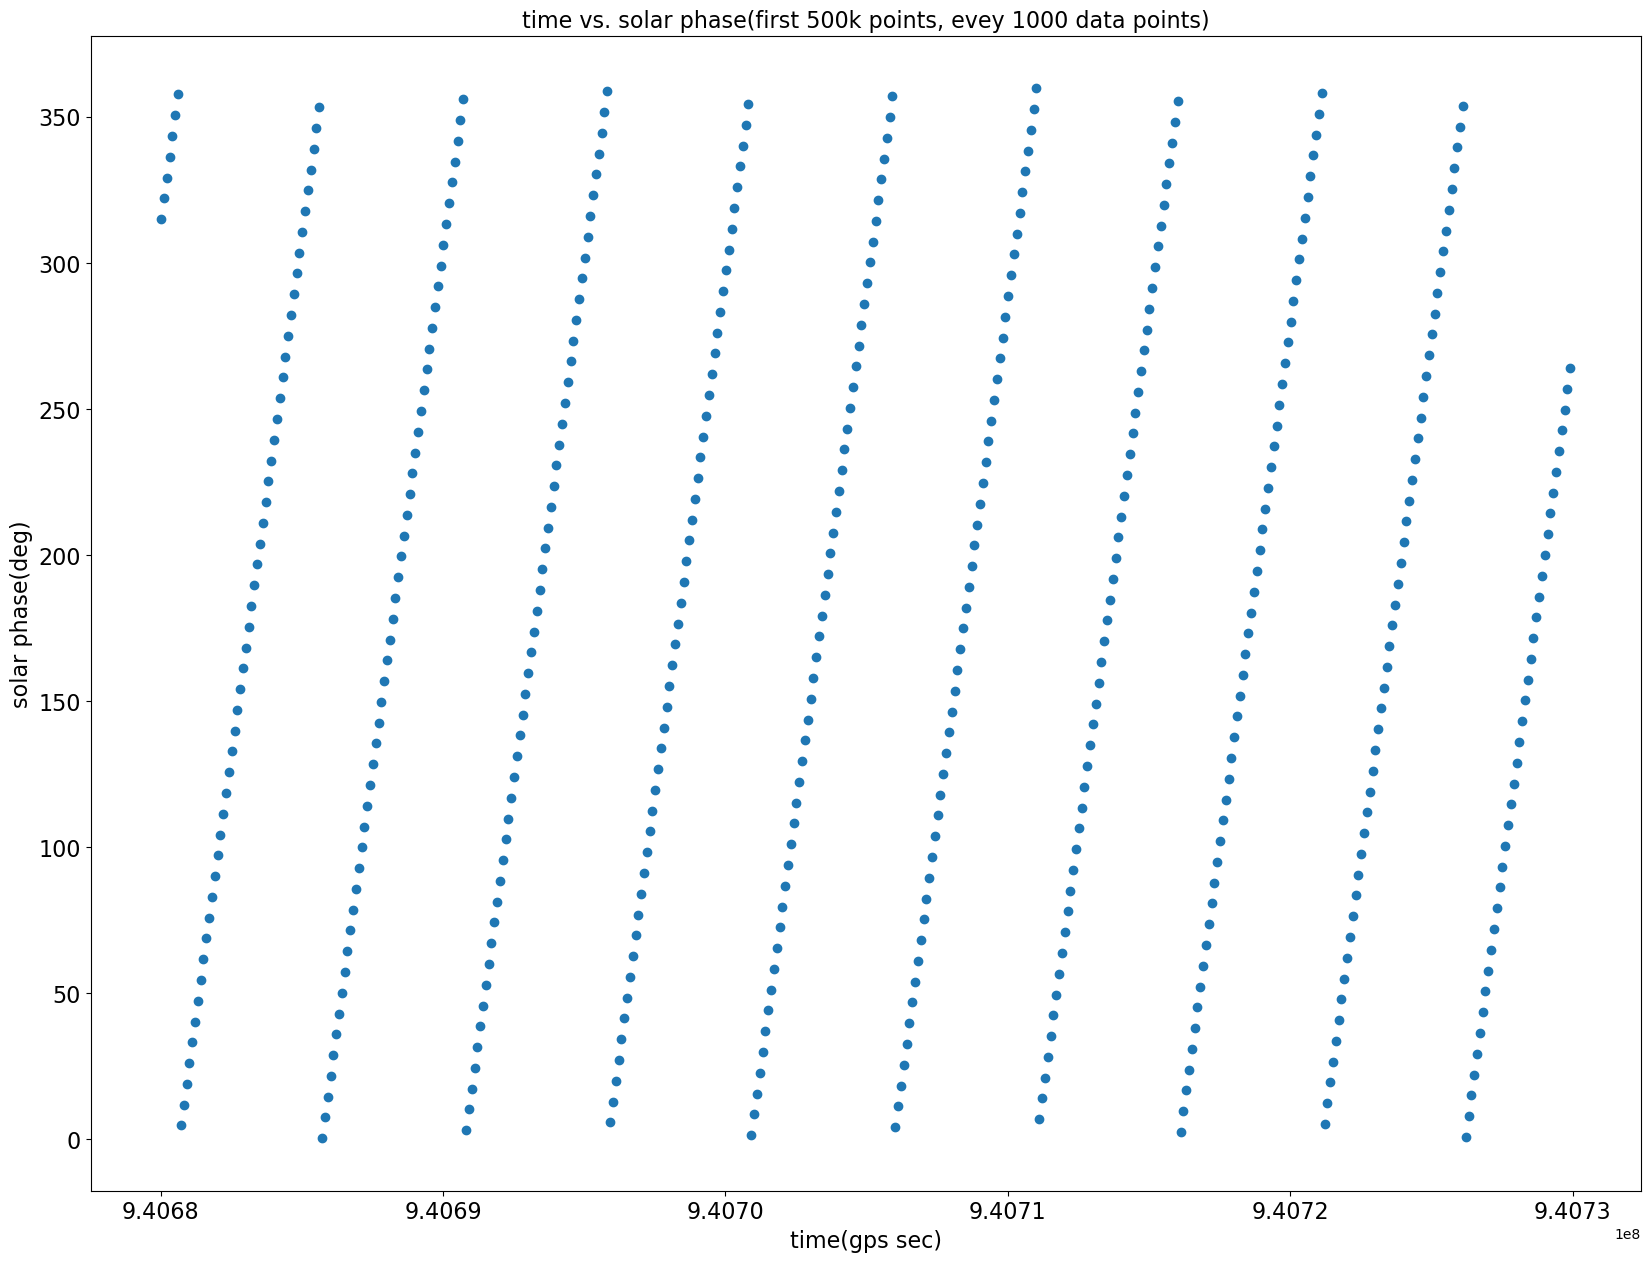

In [4]:
plt.plot(data[0][0:500000:1000],data[1][0:500000:1000] ,'o')
plt.title('time vs. solar phase(first 500k points, evey 1000 data points)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('time(gps sec)', fontsize=16)
plt.ylabel('solar phase(deg)', fontsize=16)
plt.show()

Approximately, the pattern repeats every 5400 gps sec. Notice that the interval for time is 100 ms. In another word, the pattern repeats every 54000 data points.

Now let's plot time vs. longitude. We still look at only first few patterns of data points(first 500k, every 100th data points.)

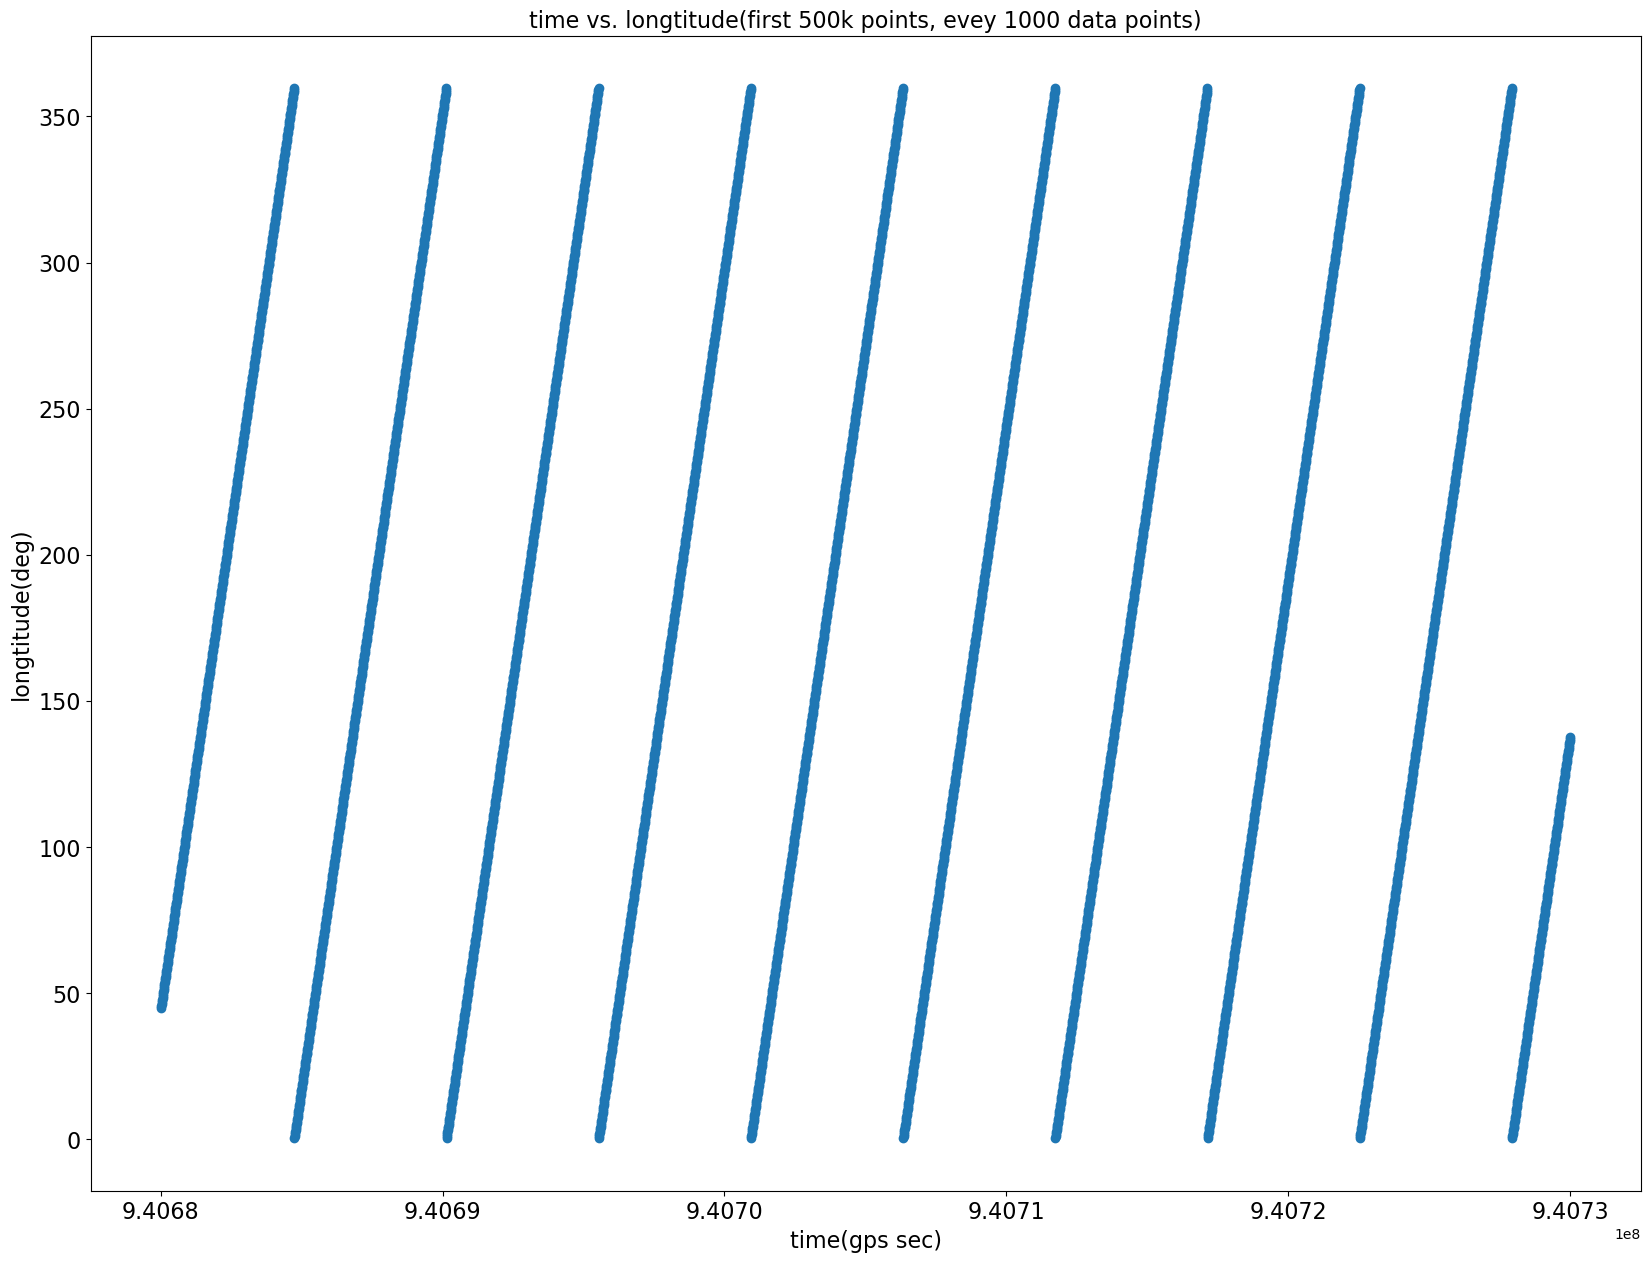

In [5]:
plt.plot(data[0][0:500000:100],data[2][0:500000:100] ,'o')
plt.title('time vs. longtitude(first 500k points, evey 1000 data points)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('time(gps sec)', fontsize=16)
plt.ylabel('longtitude(deg)', fontsize=16)
plt.show()

Just as solar phase, the longitude is also repeating the pattern with respect to time, around every 5.4 gps sec.
Regarding the data collected for solar phase and earth longitude, there is no data contamination, as their pattern of the data perfectly repeats without disturbance or outliar.

Now let's see how the counts of Gamma rays are dependent on time.

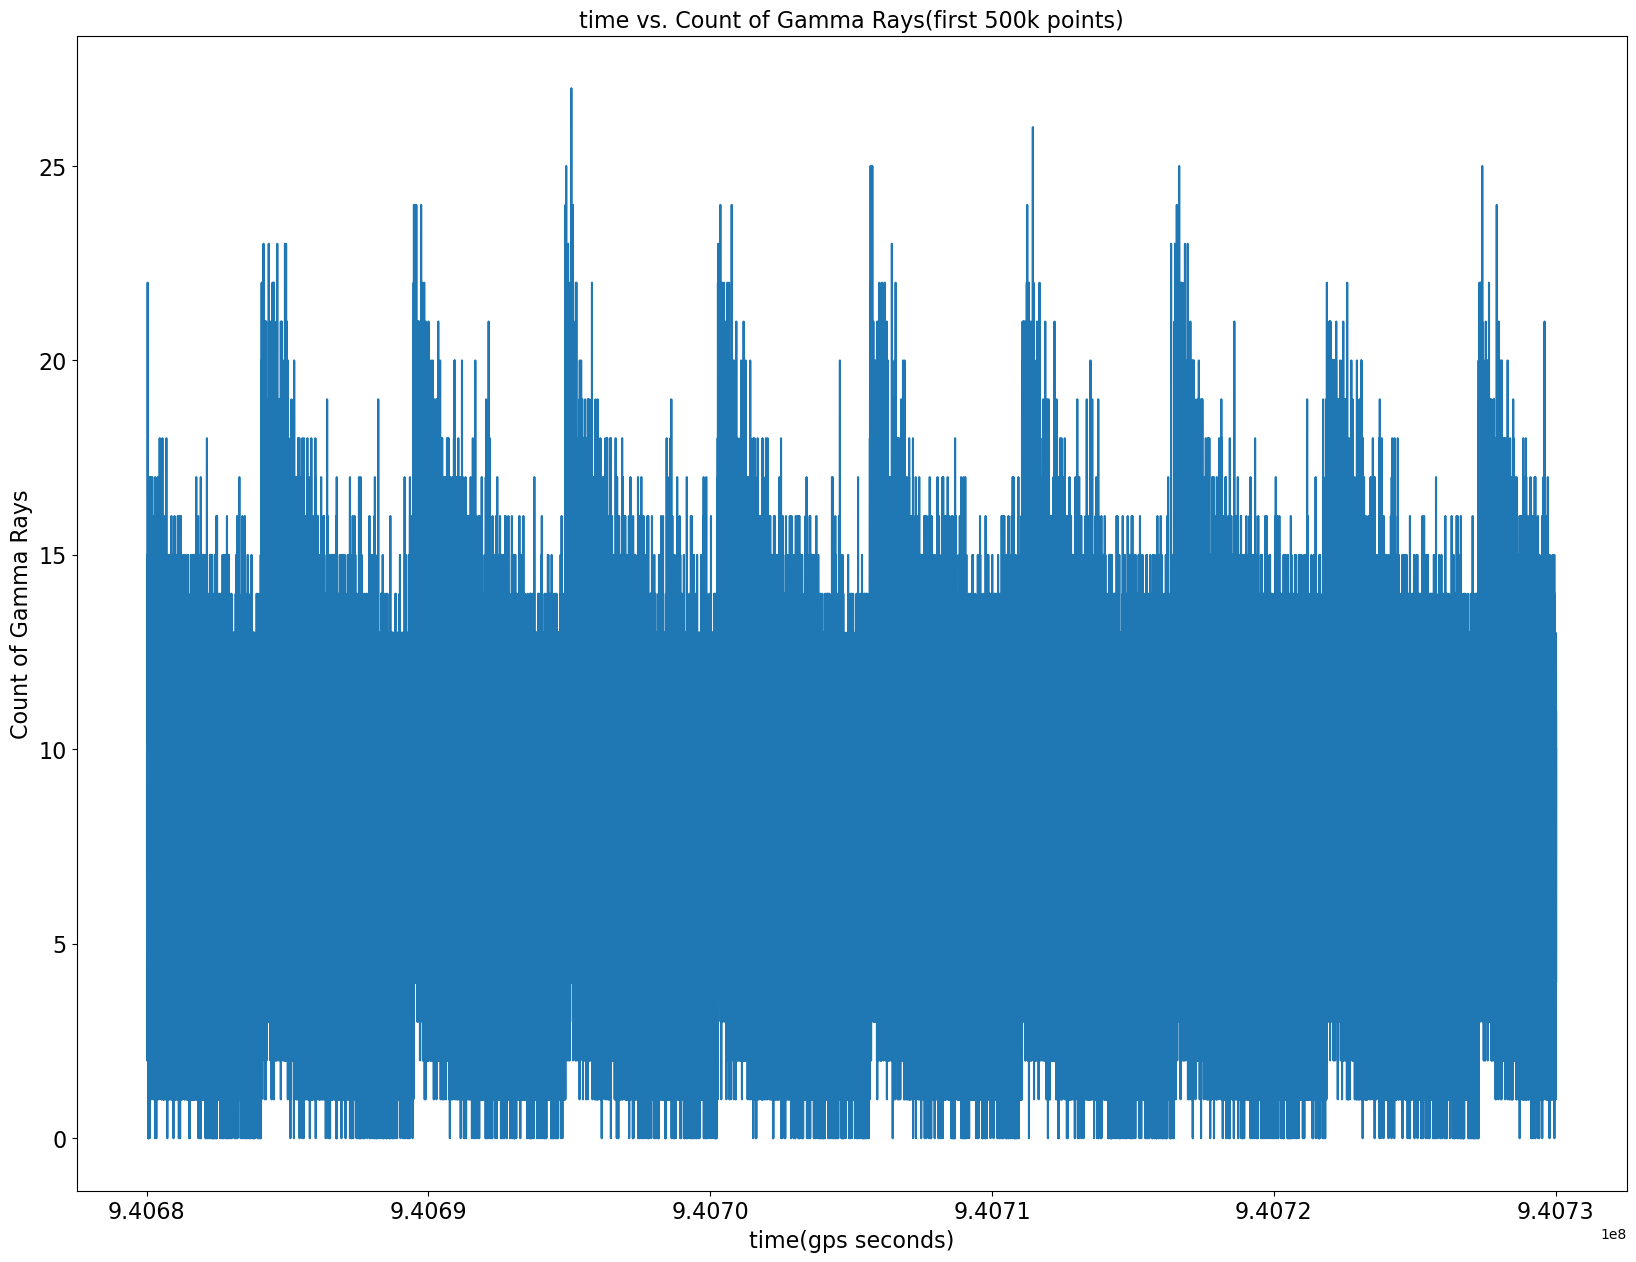

In [6]:
plt.plot(data[0][0:500000],data[3][0:500000])
plt.title('time vs. Count of Gamma Rays(first 500k points)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('time(gps seconds)', fontsize=16)
plt.ylabel('Count of Gamma Rays', fontsize=16)
plt.show()

It is easy to tell the count of Gamma Rays have a repetitive pattern from the repition of their spikes aronund every 5.4k gps seconds as well!

Let's see how the density of data points is like by plotting a 2d histogram plot for the first 500k points(every 100th point) at different time.

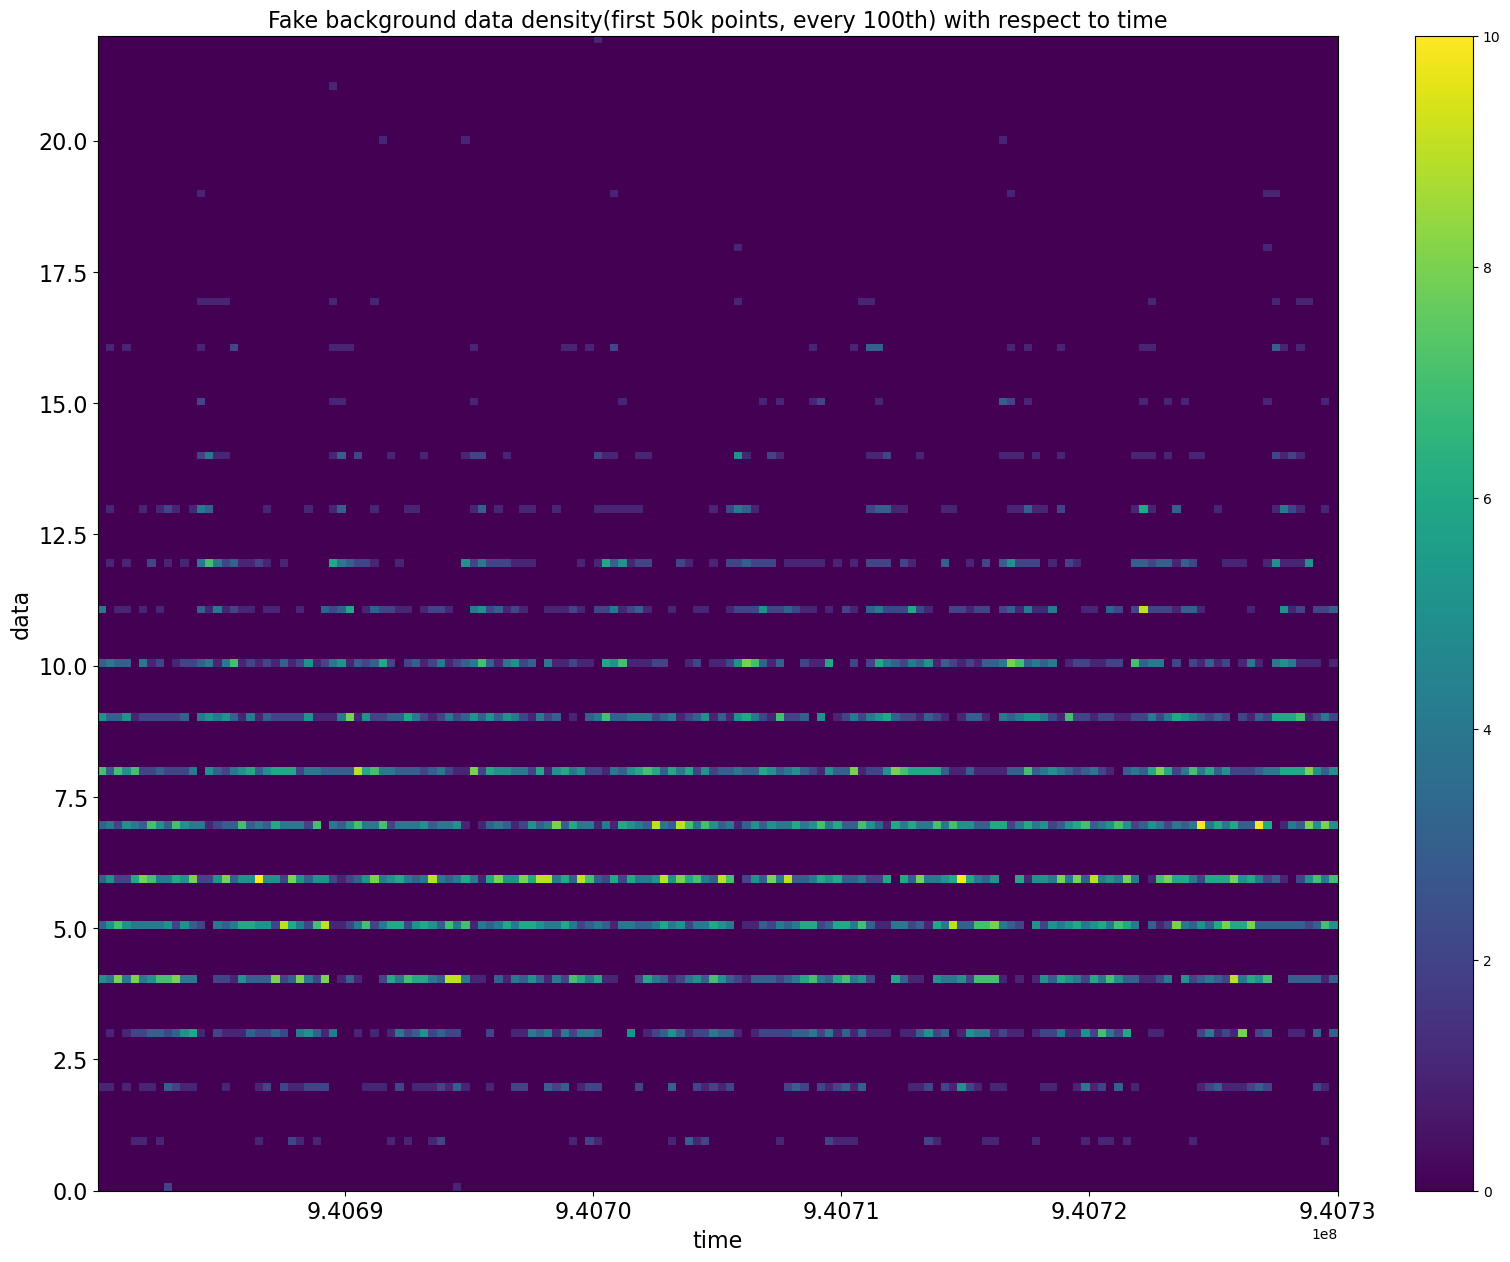

In [7]:
hist_plot = plt.hist2d(data[0][0:500000:100],data[3][0:500000:100], bins=150 )
plt.colorbar(hist_plot[3])
plt.title('Fake background data density(first 50k points, every 100th) with respect to time', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('time', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.show()

From the histogram, the data points gather more around between 5 to 10, indicated by their brighter region in our 2d histogram.

If we plot the 1d histogram of the number of data points with different values, will we get a distribution that we already knew?

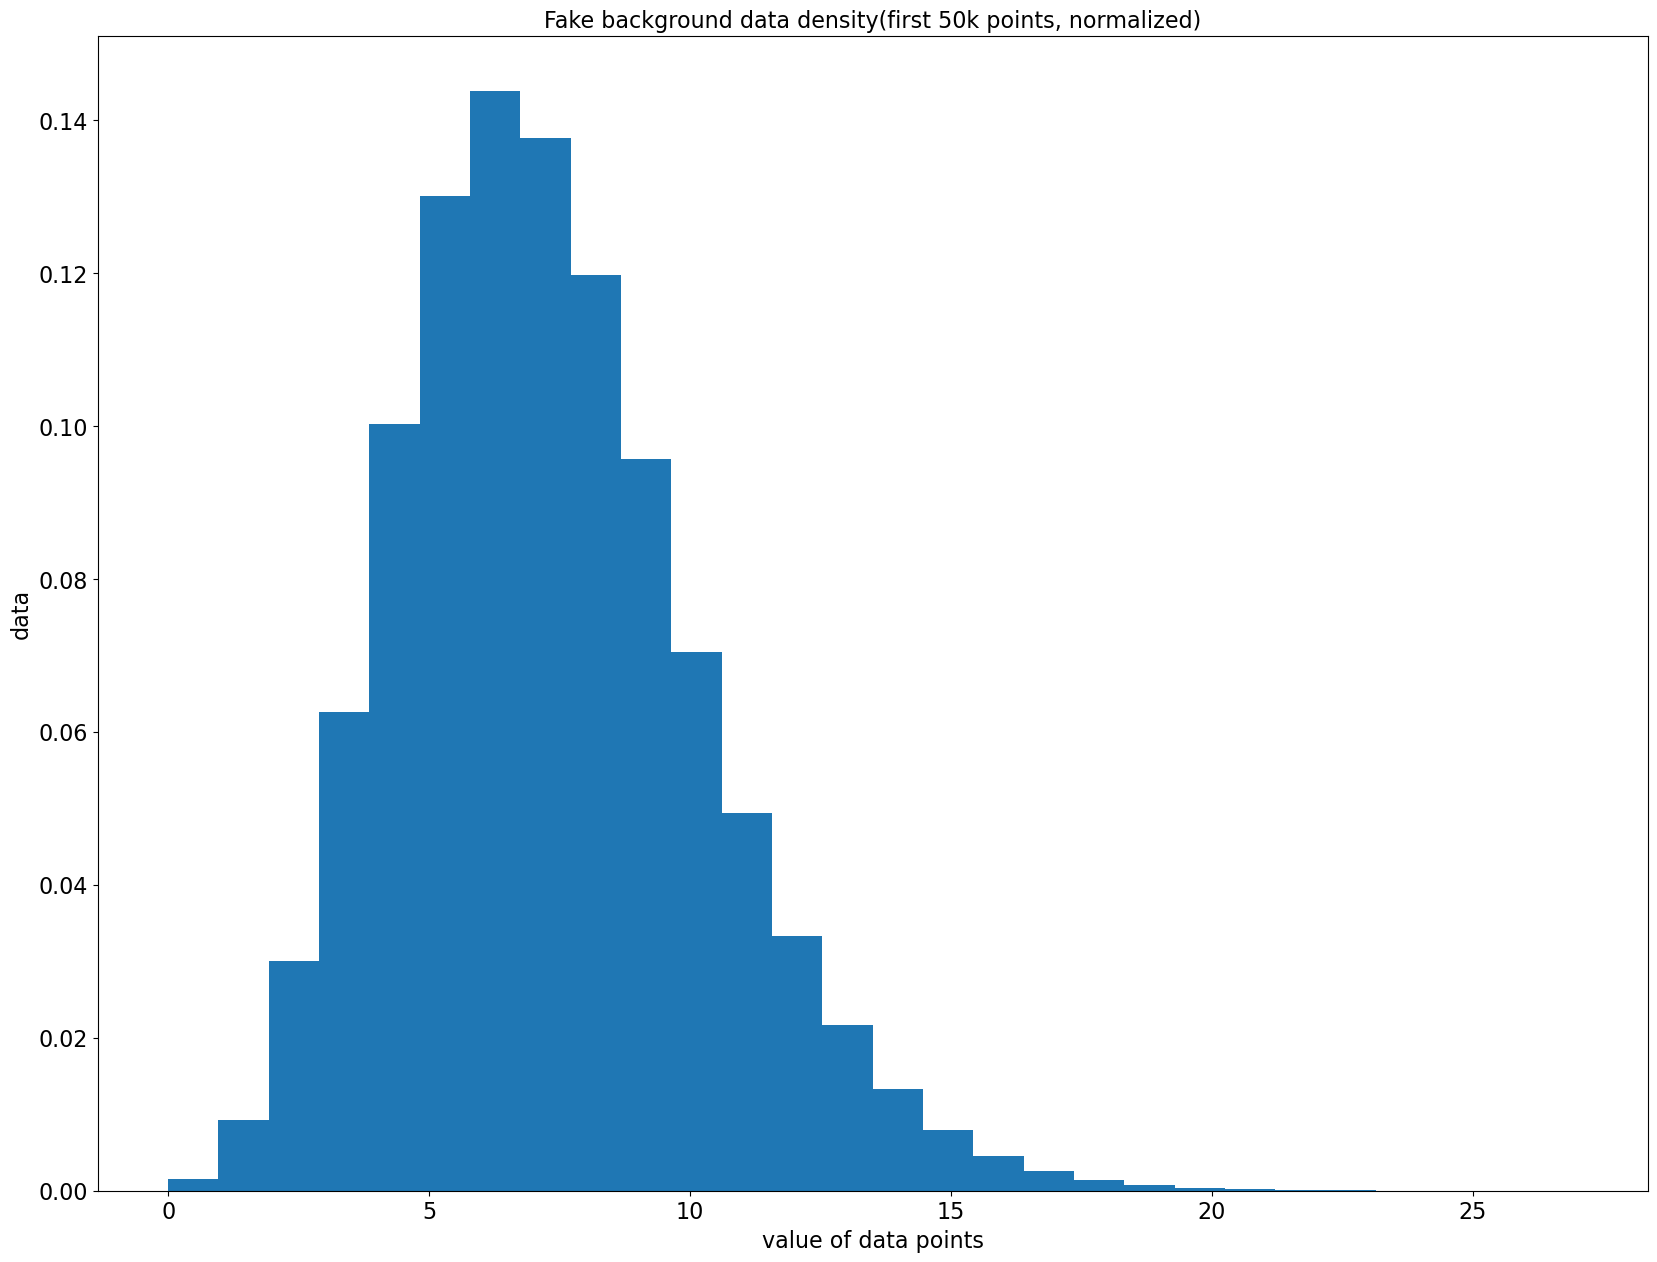

In [8]:
hist_plot = plt.hist(data[3][0:500000], bins=28, density = True )
plt.title('Fake background data density(first 50k points, normalized)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('value of data points', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.show()

Its appearance resonates with one of the discrete distributions we already knew: Poisson! The peak of our data locates at 6. Hence let's compare how similar it is with the real Poisson($\lambda = 6).$

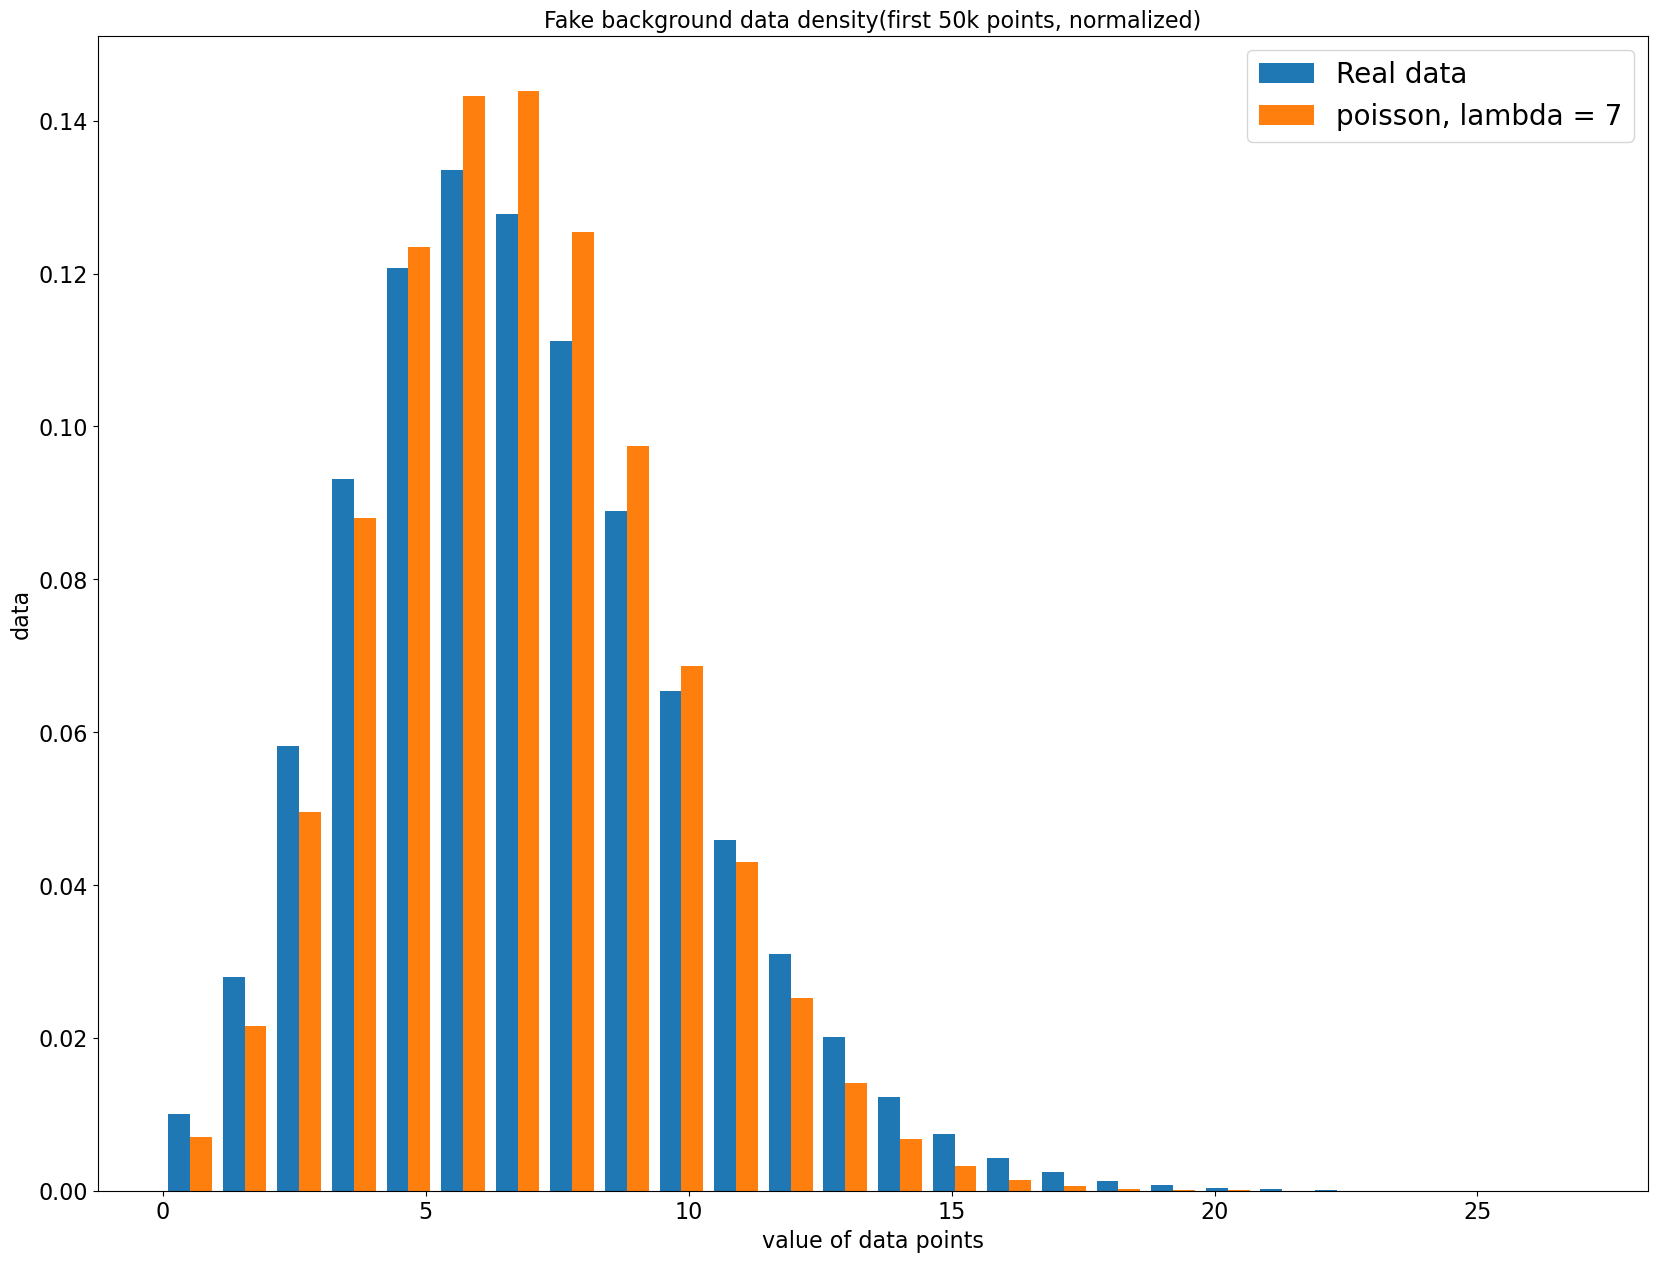

In [9]:
num_points = 500000
dist = stats.poisson(7) #real poisson distribution
vals = dist.rvs(num_points)
plt.hist([data[3][0:num_points], vals], bins=26, density = True )
plt.title('Fake background data density(first 50k points, normalized)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('value of data points', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.legend(['Real data', 'poisson, lambda = 7'],  prop={"size":20})
plt.show()

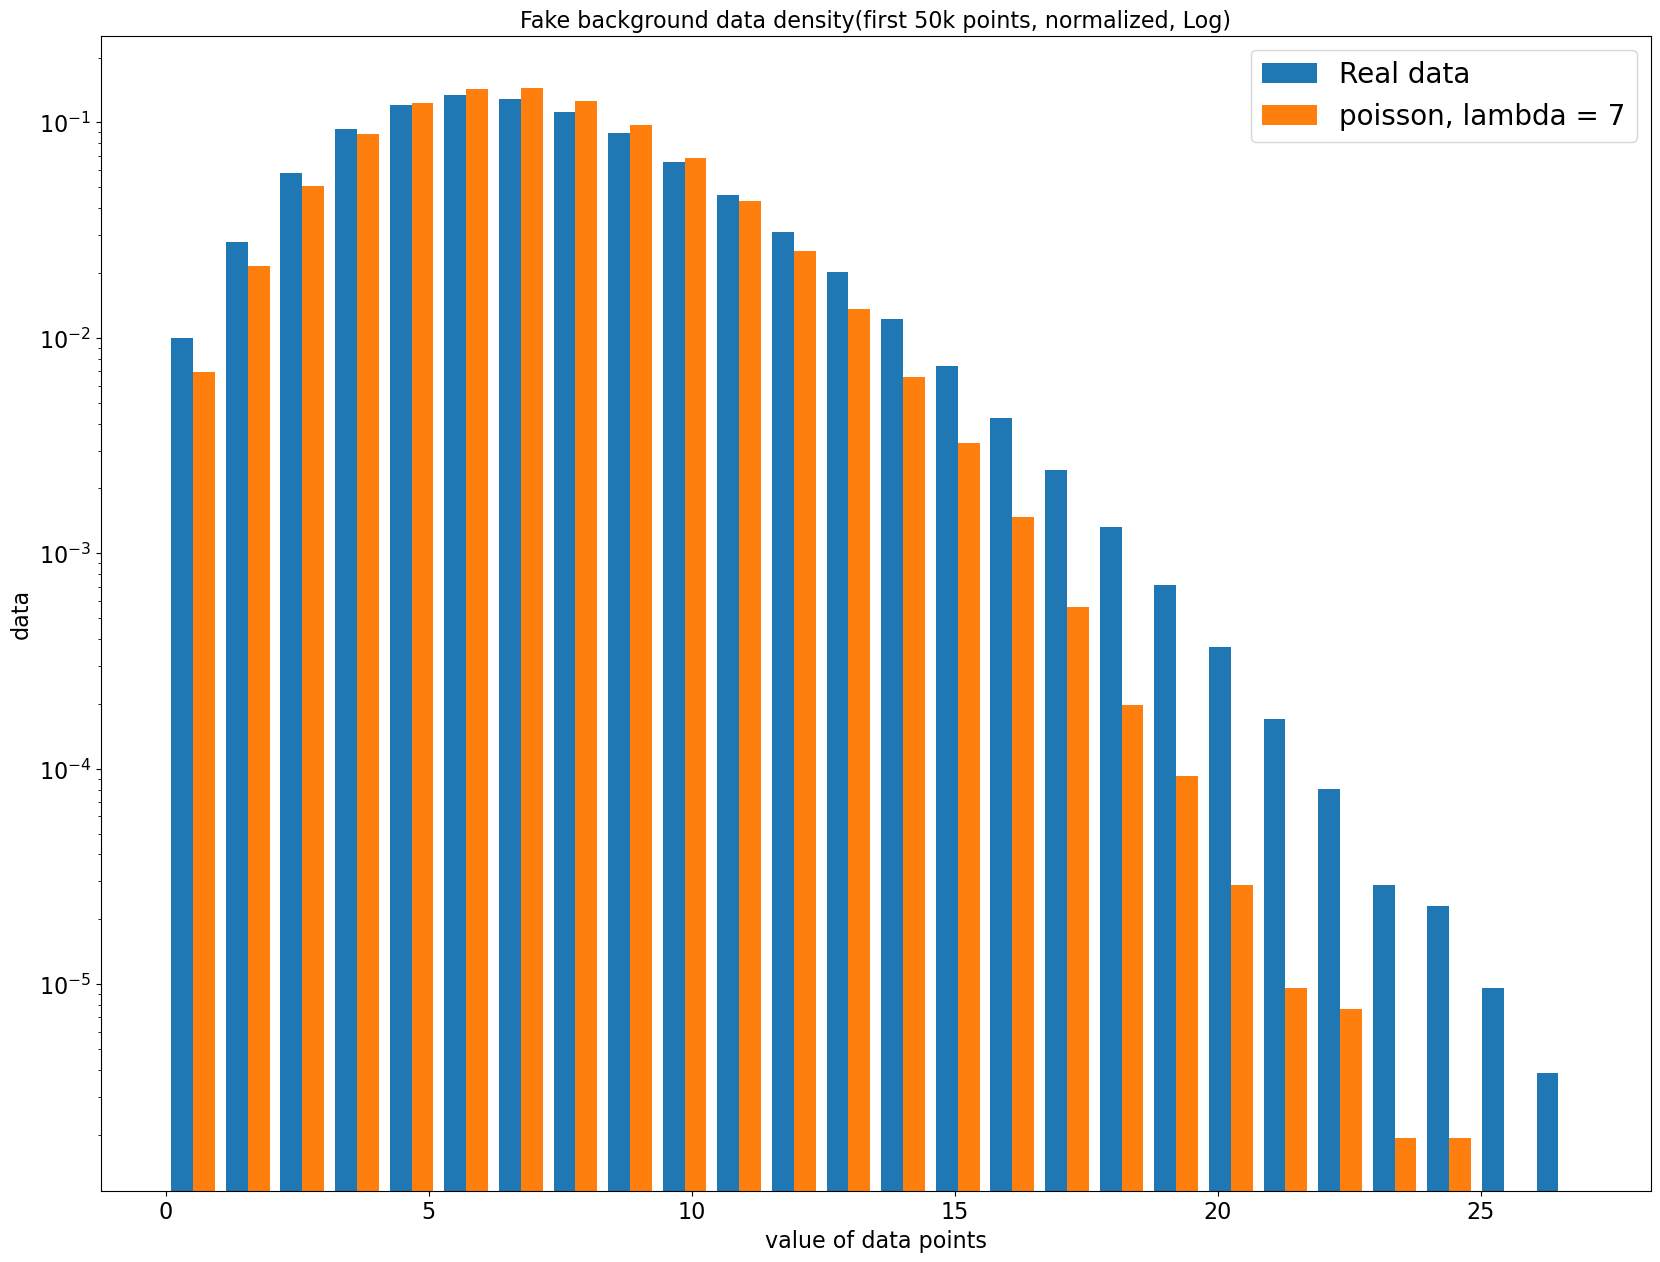

In [10]:
dist = stats.poisson(7) #real poisson distribution
vals = dist.rvs(num_points)
plt.yscale('log')
plt.hist([data[3][0:num_points], vals], bins=26, density = True )
plt.title('Fake background data density(first 50k points, normalized, Log)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('value of data points', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.legend(['Real data', 'poisson, lambda = 7'],  prop={"size":20})
plt.show()

From the comparison of two histrograms and their logarithmic plots, they are more similar(although not compeletly same) for smaller x value, but the tails of two plots diverge from each other and have a larger difference(more obvious from the log graph). It is the indication that the data for Gamma Rays counts might be contaminated. This raw data defninitely does not follow a Poisson distribution.

Well. As mentioned previously, the solar phase and earth longitude is also having periodic pattern, as our data does. What if the data contamination comes from the aspect of different soalr phase and longtiude? If we can figure out how our data is related with these two variables, we can figure out our background pdf.

#### **2)** The background is **not** consistent across the dataset. **Find and describe as accurately as you can how the background changes.**

Let's put the solar phase, earth longtitude and our data for counts of Gamma rays into one graph with respect to time to see if their repetitions are related with each other.

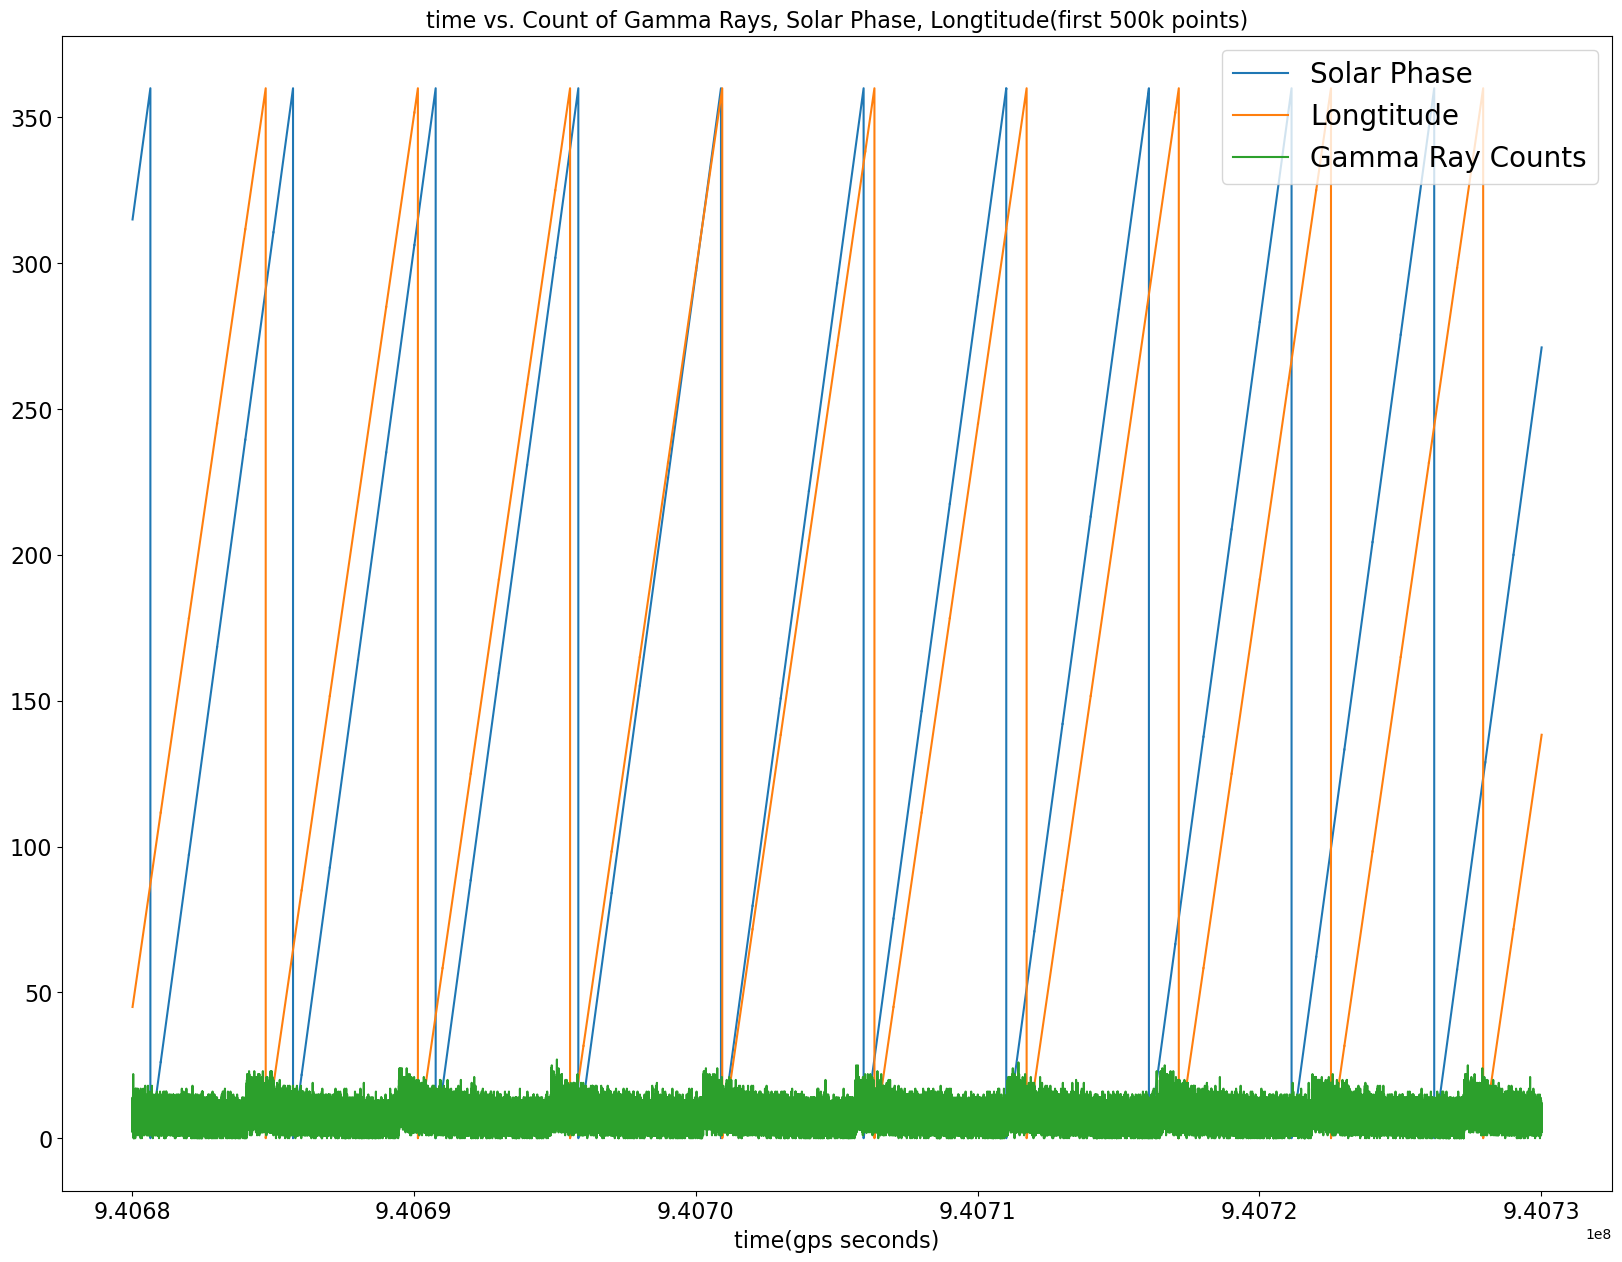

In [11]:
plt.plot(data[0][0:500000],data[1][0:500000])
plt.plot(data[0][0:500000],data[2][0:500000])
plt.plot(data[0][0:500000],data[3][0:500000])
plt.title('time vs. Count of Gamma Rays, Solar Phase, Longtitude(first 500k points)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('time(gps seconds)', fontsize=16)
plt.legend(['Solar Phase', 'Longtitude', 'Gamma Ray Counts'],  prop={"size":20})
plt.show()

Looking into the graph, the patterns of solar phase is slightly out of phase with a different period compared with the Gamma Ray raw data. But the longtitude has a same period of repetition as Gamma Ray data does. We can conclude the solar phase is not directly related to the pattern of Gamma Ray counts, but the longtitude is.

Another feature this graph tells is that, every time when the value of longtitude starts is decreasing rapidly in each repetition, there will be a huge spike occured in the number of Gamma Rays detected: This might be the source of our data contamination! It exaplains why our raw data distribution has a longer trails than the real Poisson distribution. If we exclude the regions where those abnormal spikes occur from our consideration, we might obtain a more accurate background distribuiton for the counts of Gamma Rays.

For finding the change with time dependence, we can fold our data by peiord(~5.4k gps second, or 54k data points), so that we obtain the distribution of Gamma Ray data dependent on time in one period.

Let's look at the distribtution at a specific time in one period.

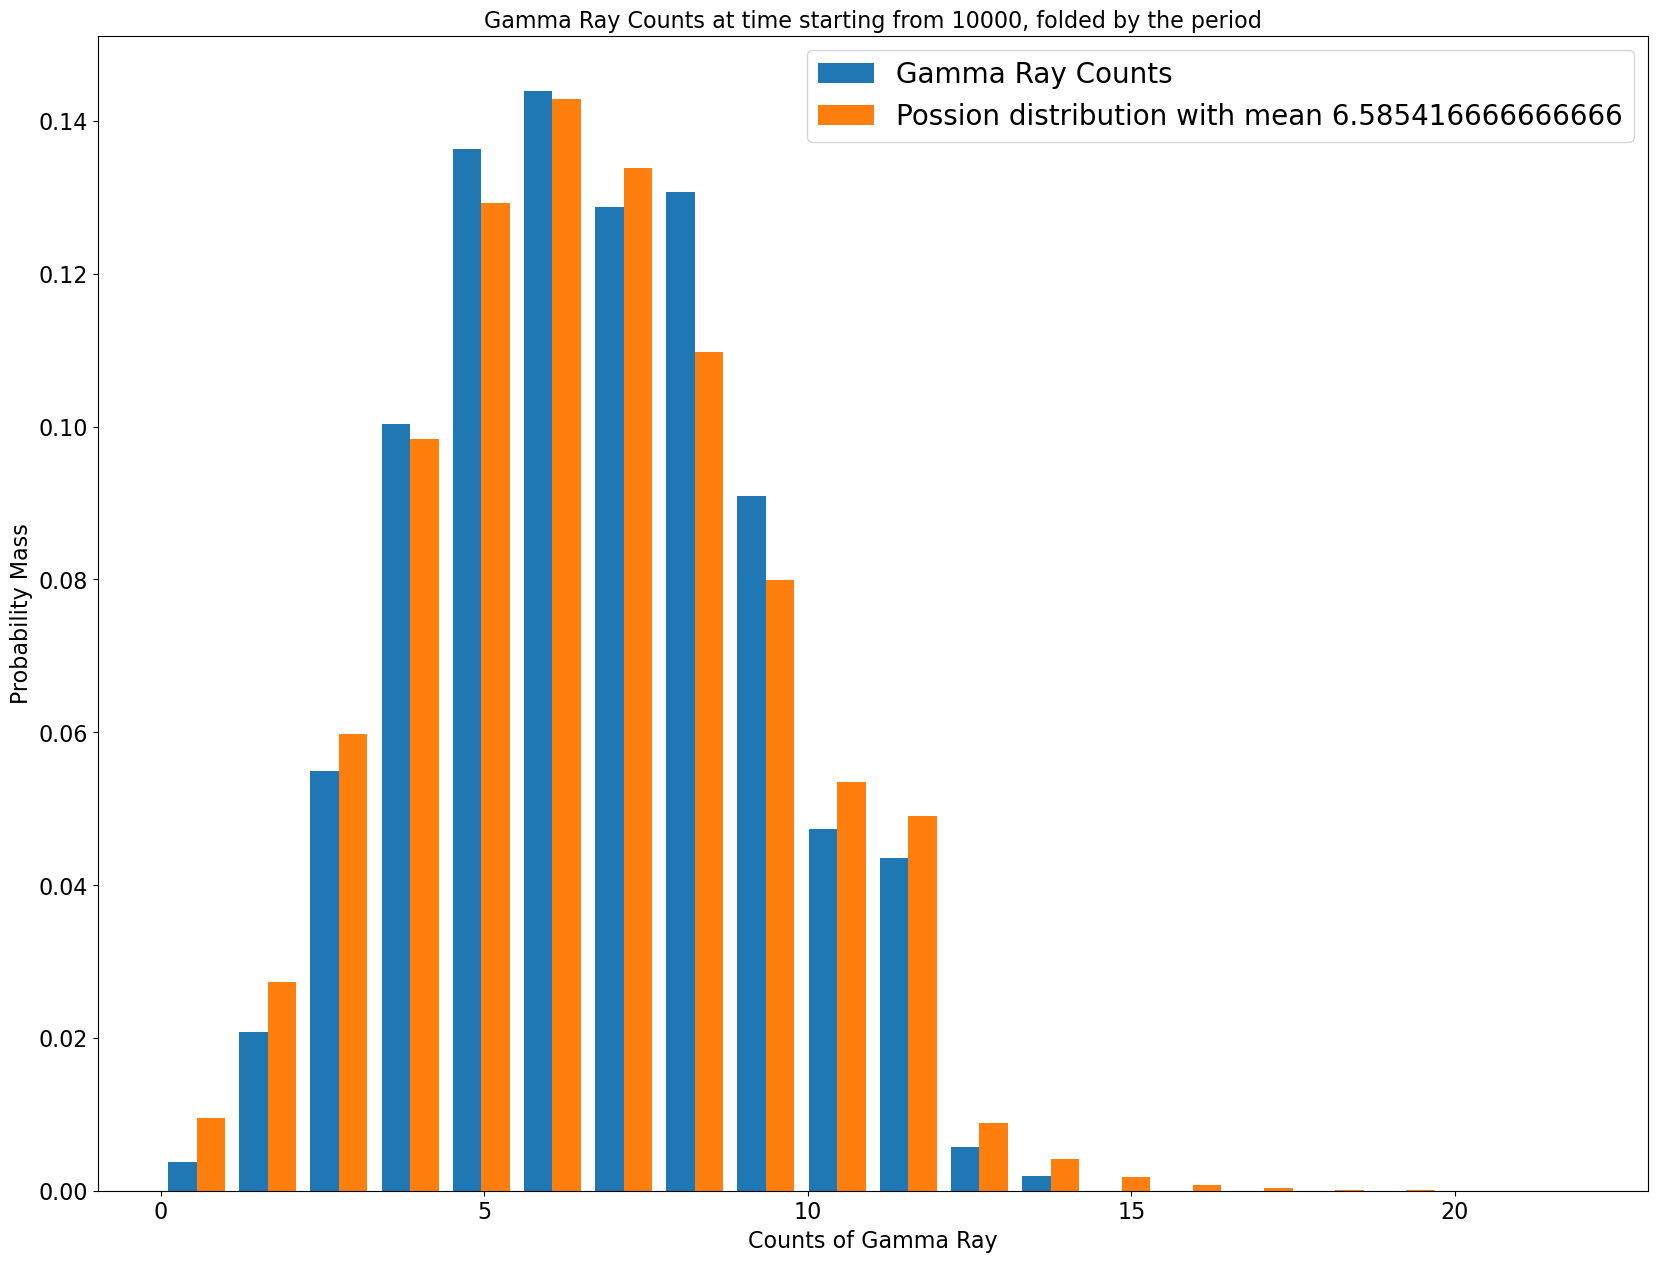

In [12]:
period = 54000;
mean_value = np.mean(data[3][10000:len(data[3]):period])
dist = stats.poisson(mean_value) #real poisson distribution
vals = dist.rvs(num_points)
plt.hist([data[3][10000::period], vals], bins=20, density = True )
plt.title('Gamma Ray Counts at time starting from 10000, folded by the period', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.xlabel('Counts of Gamma Ray', fontsize=16)
plt.ylabel('Probability Mass', fontsize=16)
plt.legend(['Gamma Ray Counts', 'Possion distribution with mean ' + str(mean_value)],  prop={"size":20})
plt.show()


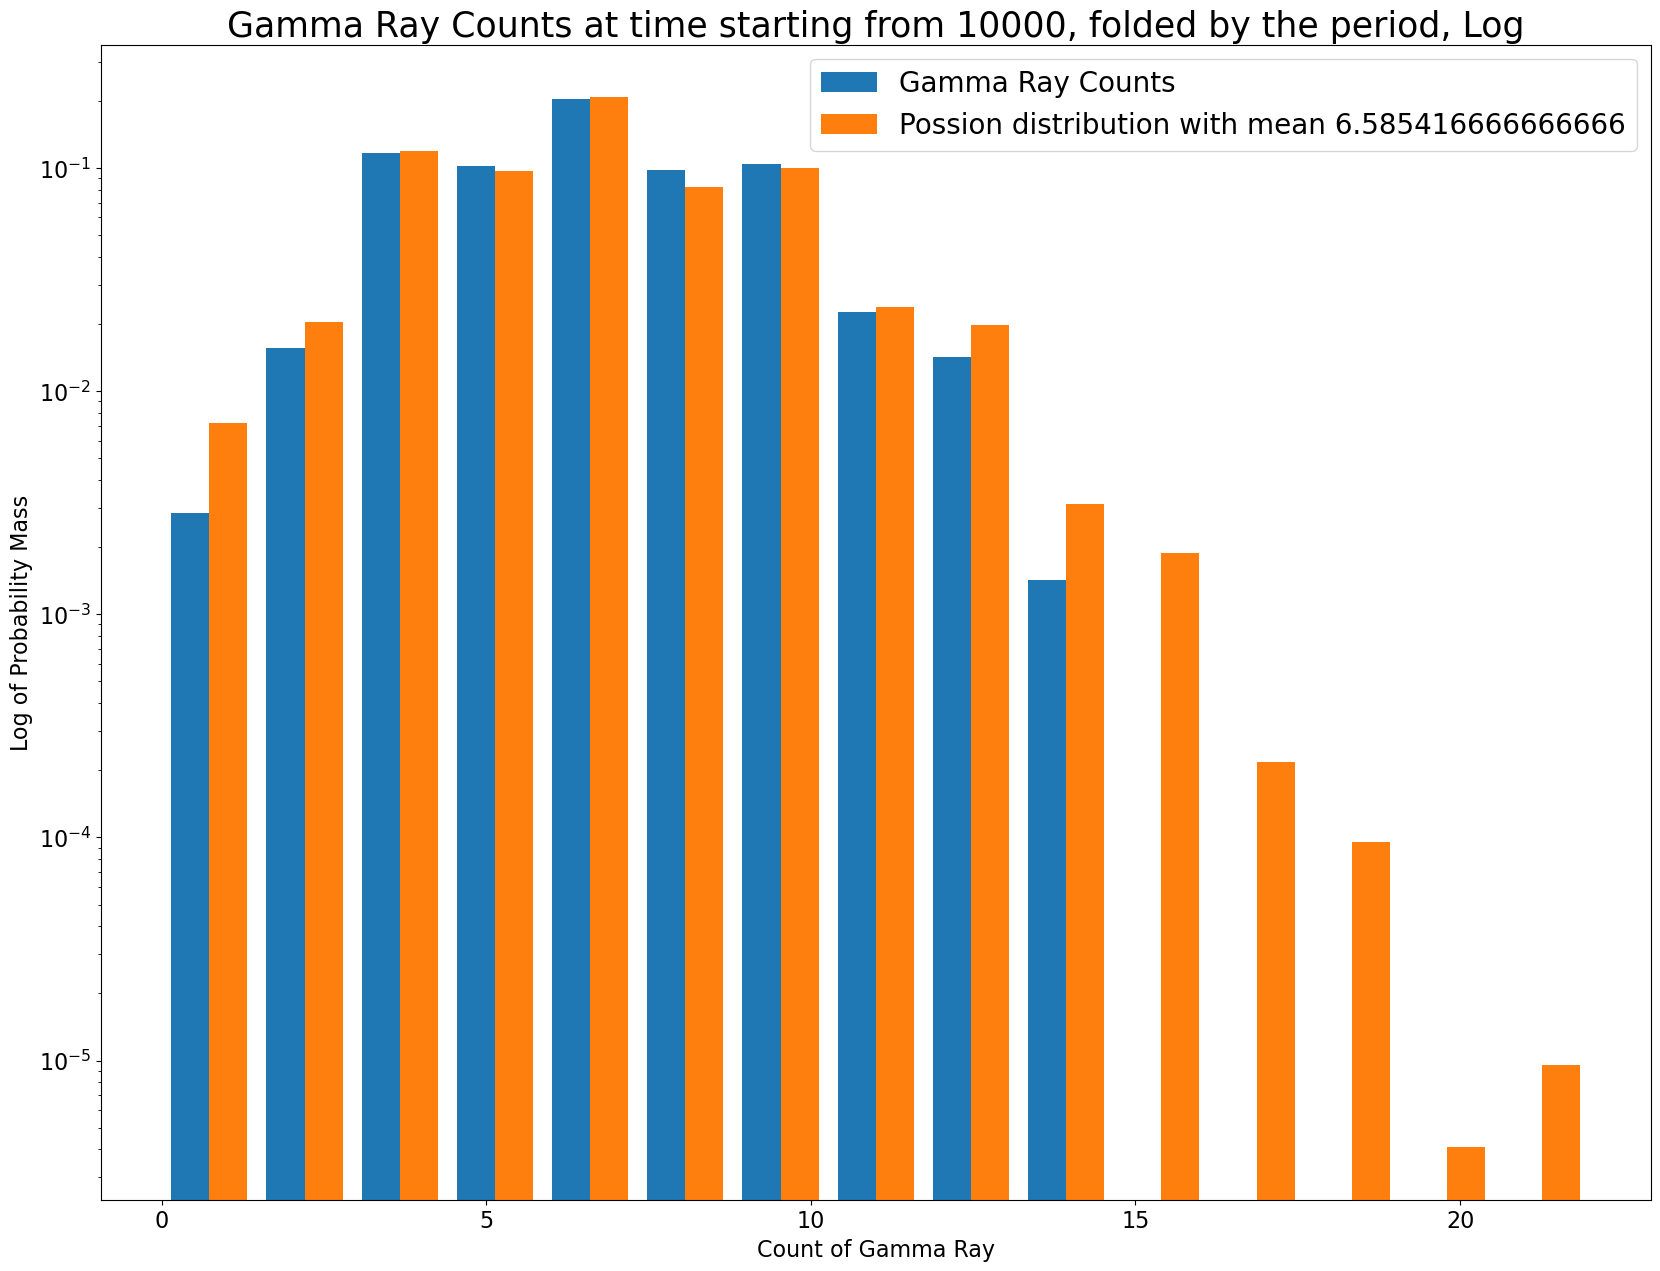

In [13]:
plt.yscale('log')
plt.hist([data[3][10000::period], vals], bins = 15, density = True )
plt.title('Gamma Ray Counts at time starting from 10000, folded by the period, Log', fontsize = 25)
plt.tick_params(labelsize = 16)
plt.xlabel('Count of Gamma Ray', fontsize=16)
plt.ylabel('Log of Probability Mass', fontsize=16)
plt.legend(['Gamma Ray Counts', 'Possion distribution with mean ' + str(mean_value)],  prop={"size":20})
plt.show()

There is still discrenpency existing at the real, but now the distribution of our data, for most part, is more close to be a real Poission distribution.

Now we know the distribution at each time in one period is given by a possion distribution, the only thing that can change dependent on time will be the mean of the distribution. We can use mean at each time as a parameter and see how it is dependent on time in one period. The reason why we choose 2700 as our starting point is because that's where a full pattern starts from the spike to the end.

In [14]:
mean_value_vec = []
for i in range(period):
    mean_value = np.mean(data[3][i + 40500:len(data[3]):period])
    mean_value_vec.append(mean_value)

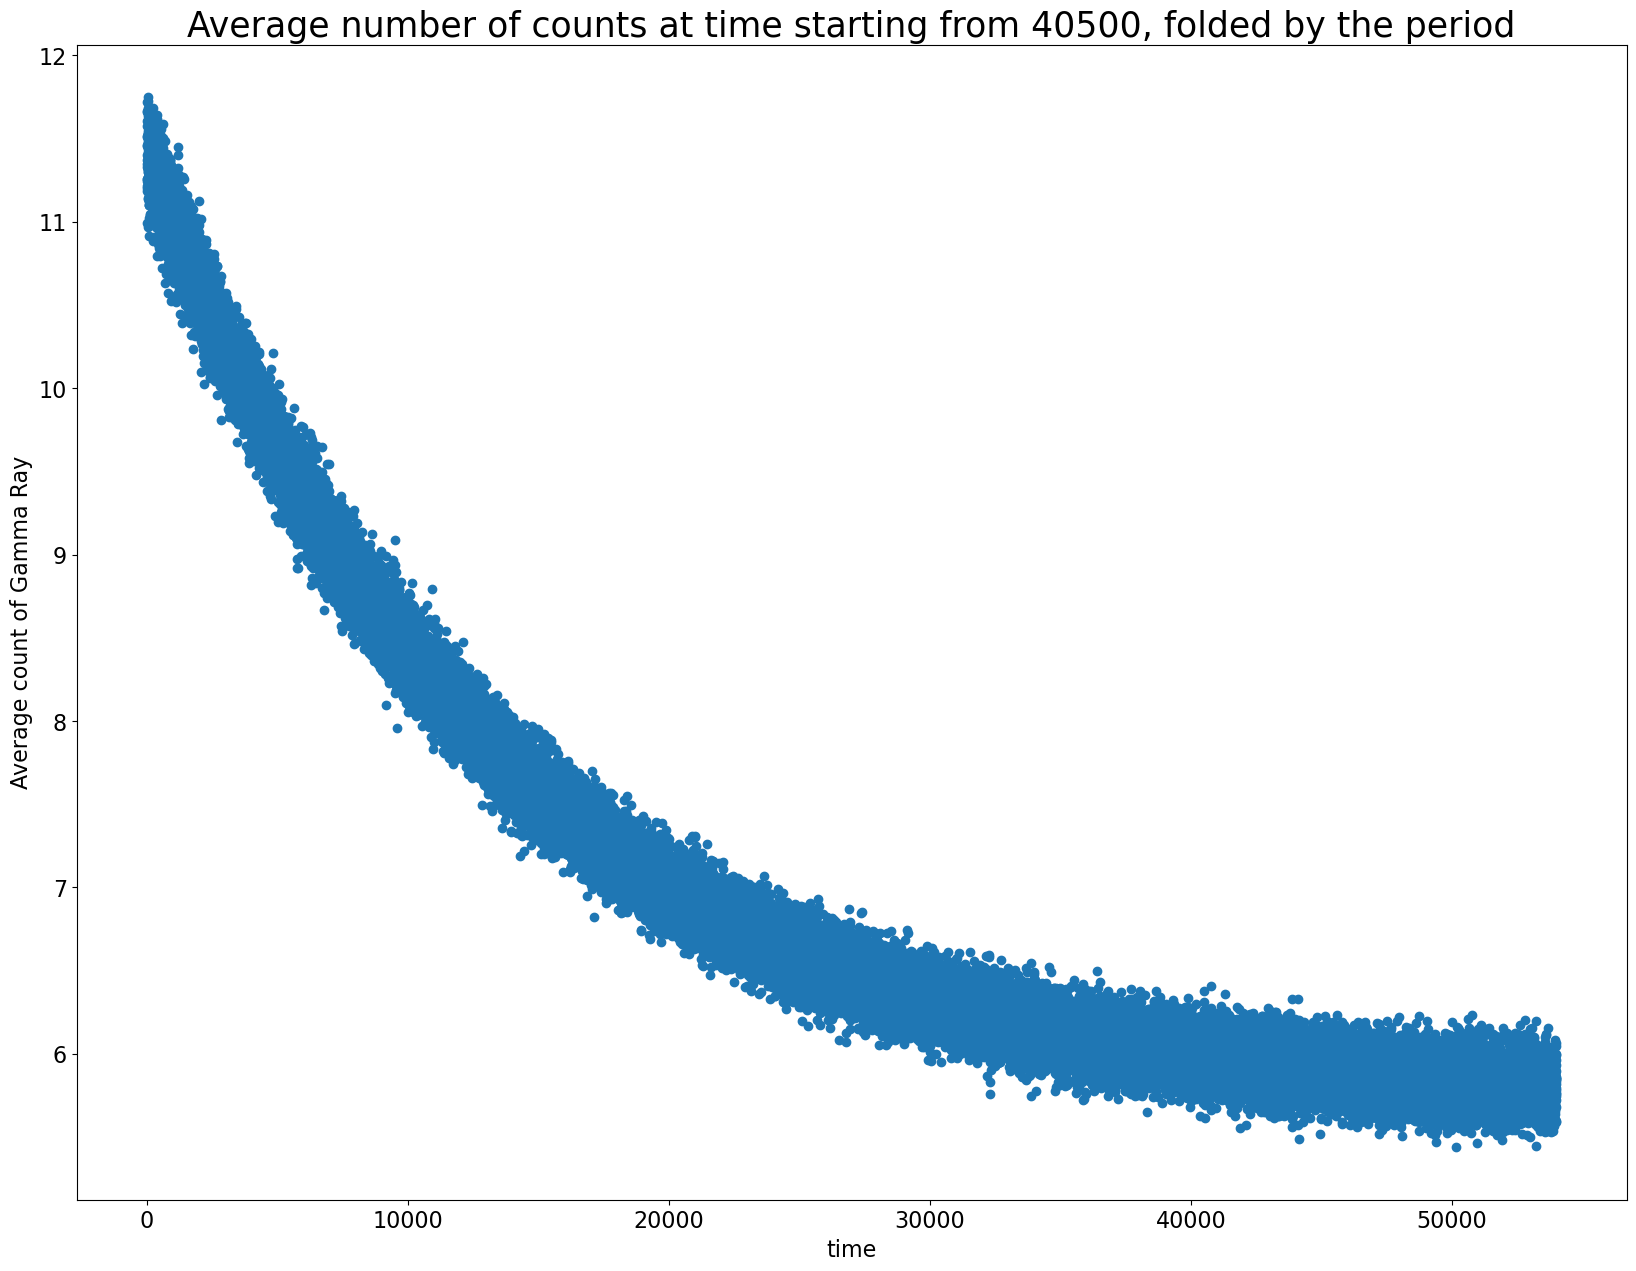

In [15]:
x = list(range(period))
plt.plot(x,mean_value_vec, 'o')
plt.title('Average number of counts at time starting from 40500, folded by the period', fontsize = 25)
plt.tick_params(labelsize = 16)
plt.xlabel('time', fontsize=16)
plt.ylabel('Average count of Gamma Ray', fontsize=16)
plt.show()

An obvious trend of average number of counts of gamma ray! It has a constant trend of declining. Let's assume it follows a exponential decreasing function. We can apply a exponential regression on our data

<ipython-input-16-aac3a908380f>:9: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
<ipython-input-16-aac3a908380f>:9: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


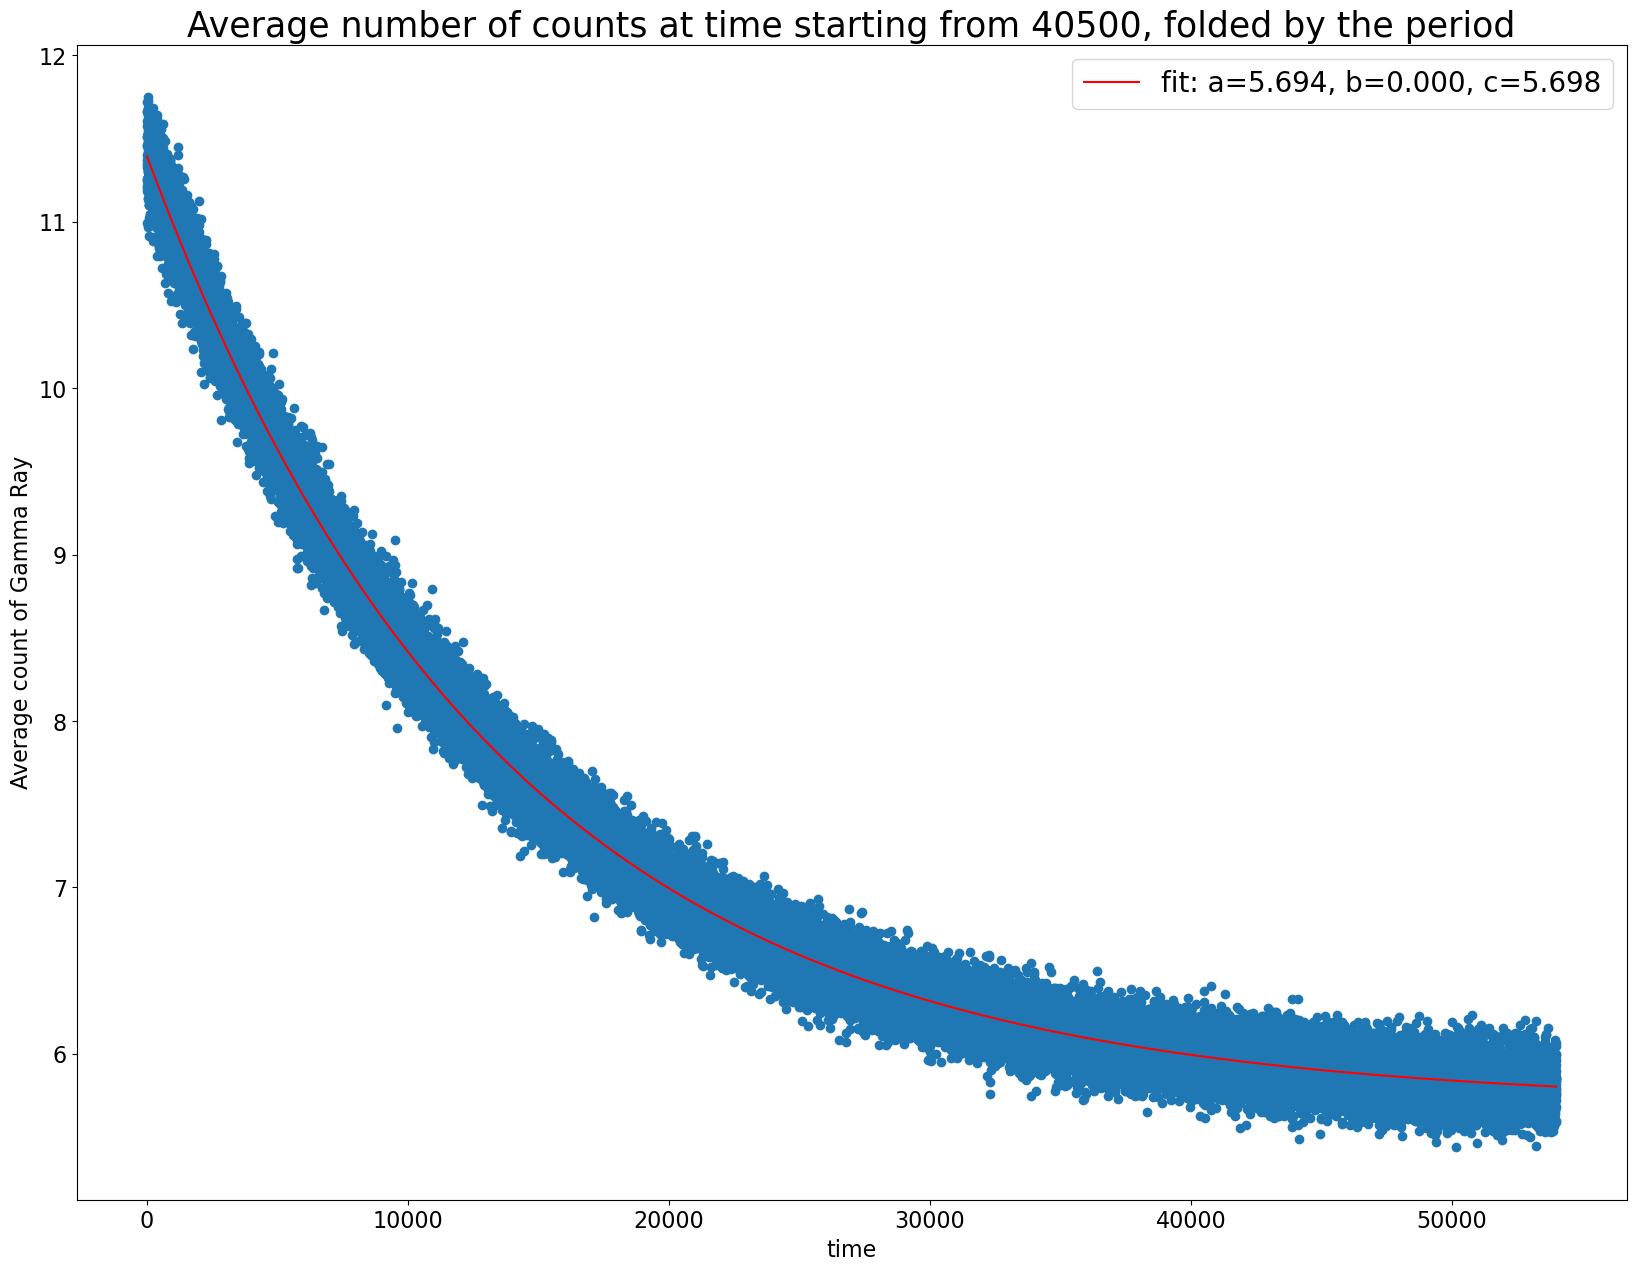

In [16]:
x = np.arange(0, period, 1, dtype=None)
param = np.polyfit(x, np.log(mean_value_vec), 1, w=np.sqrt(mean_value_vec))
y_fit = np.exp(param[1]) * np.exp(param[0] * x)

plt.plot(x,mean_value_vec, 'o')
#plt.plot(x,y_fit, linewidth=4)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
popt, pcov = curve_fit(func, x, mean_value_vec)
plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.title('Average number of counts at time starting from 40500, folded by the period', fontsize = 25)
plt.tick_params(labelsize = 16)
plt.xlabel('time', fontsize=16)
plt.ylabel('Average count of Gamma Ray', fontsize=16)
plt.legend(prop={"size":20})
#plt.legend(['Real data', 'Trendline y = ' + str(np.exp(param[1])) + '*exp(' + str(param[0]) + 'x)' ],prop={"size":20})
plt.show()

From here, we get the function of how the average number of counts of Gamma Rays detected changes with respect to time in one period!

#### **3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?**

In part one, we had the conclusion that the data corresponding to a certain value of time(folded by period) approximately follows a poisson distribution. And in part 2, we figured out the average value of the data corresponding to a certain value of time decreases exponentially in one period. Combining these two results together, we can come up with our time-dependent model in one period: the background will follow a a poisson distribution, with its mean given by the exponential function of time from part 2.

Let's try a few values of time to check how good our model fits the real data.

The values of time we choose to test on will be 20000, 24000, 28000, 32000, 36000, 40000(As we mentioned before, there is data contamination at the beginning of each period, and hence we start our test from the middle of the period).

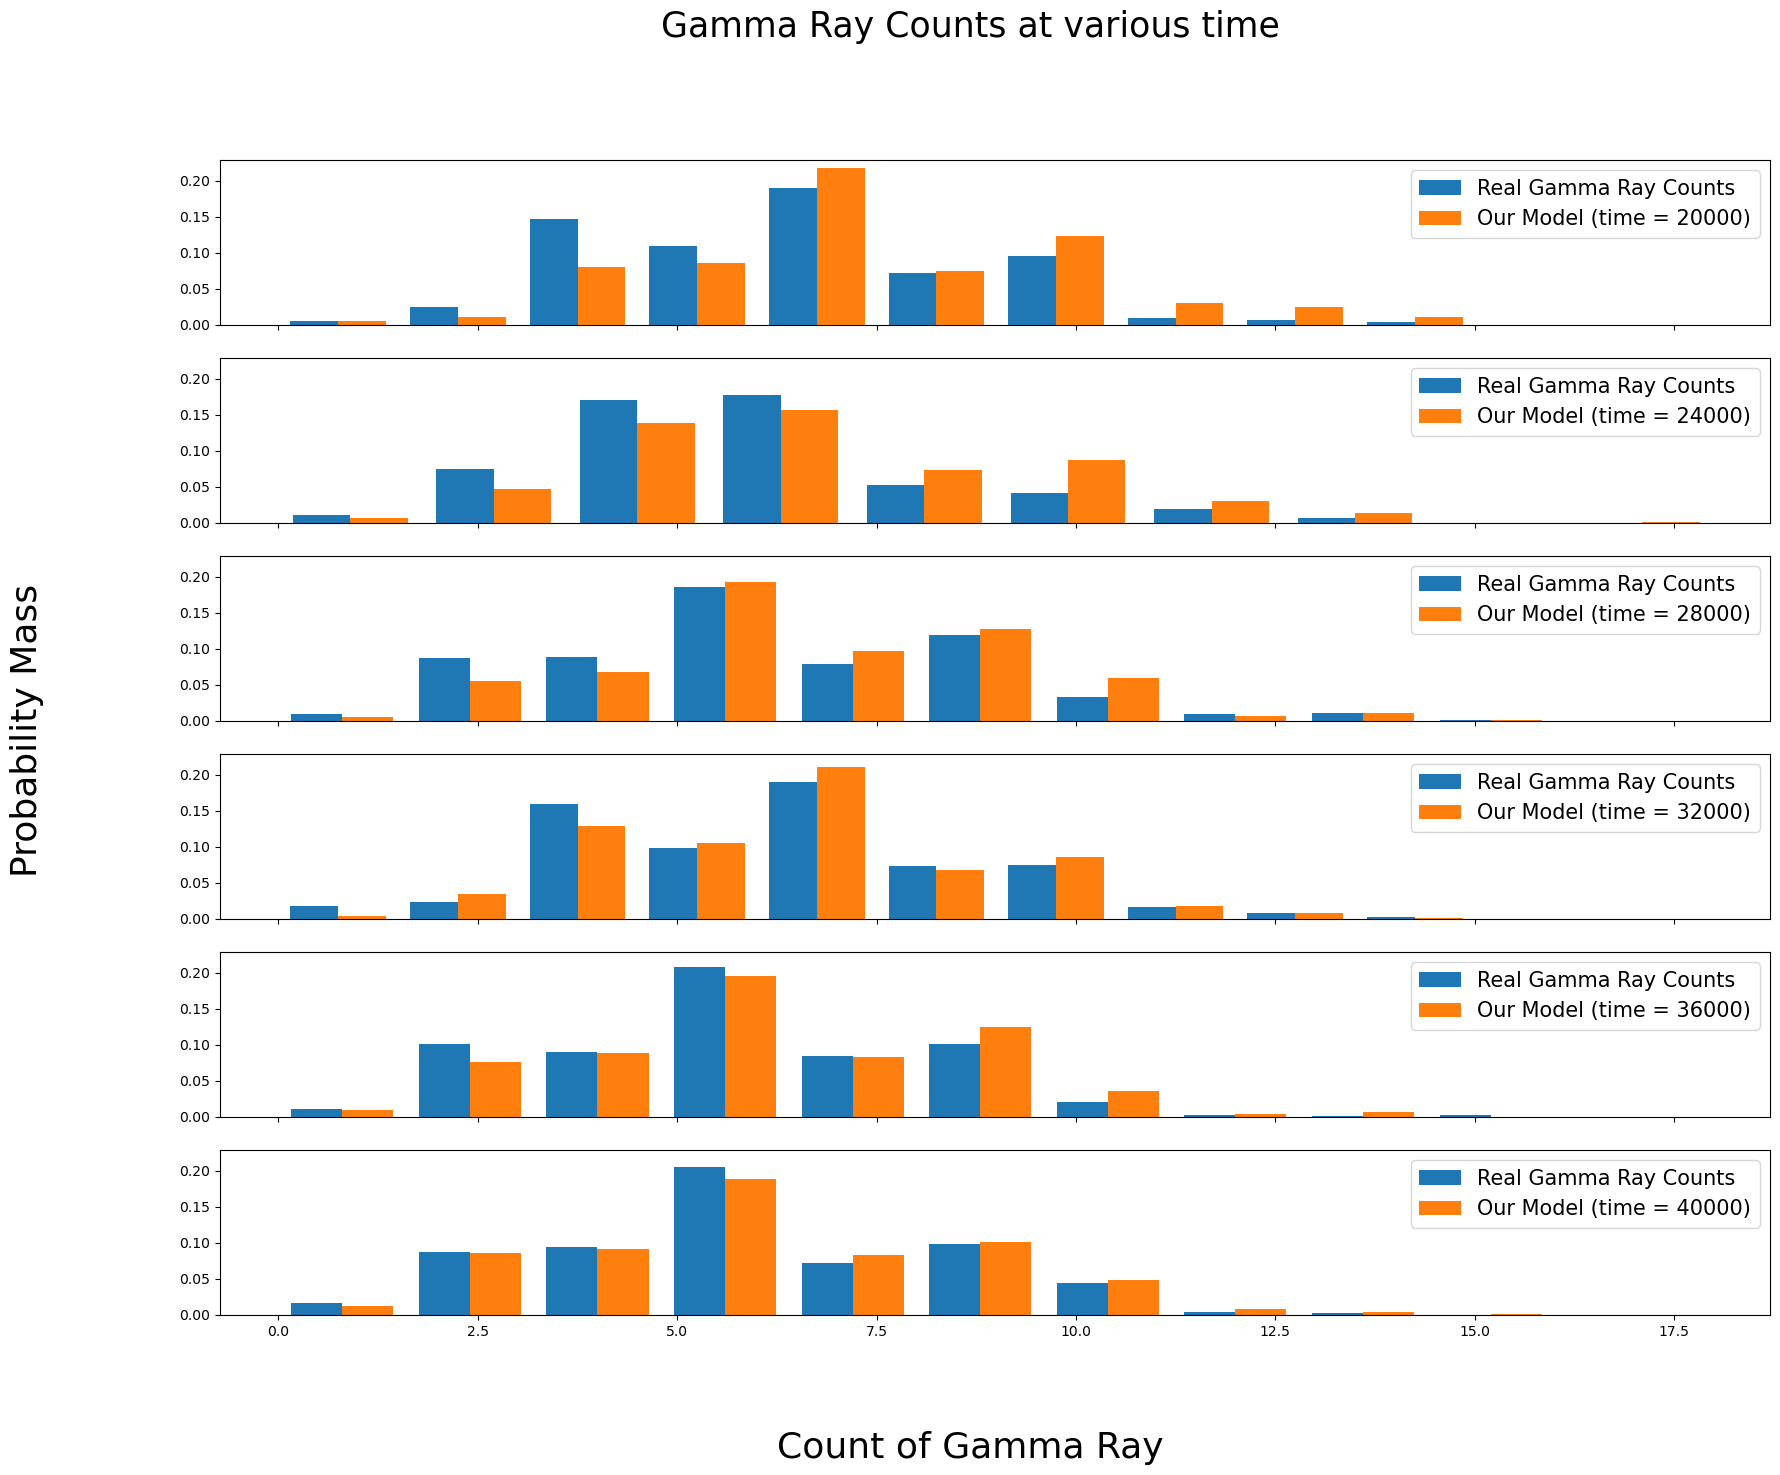

In [17]:
test_time = [20000, 24000, 28000, 32000, 36000, 40000]
fig, axs = plt.subplots(6,sharex=True, sharey=True)
fig.supylabel('Probability Mass', fontsize=26)    
fig.suptitle('Gamma Ray Counts at various time', fontsize = 25)
fig.supxlabel('Count of Gamma Ray', fontsize=26)
for i in range(6):
    mean_value = func(test_time[i], *popt)
    dist = stats.poisson(mean_value) #real poisson distribution
    new_x = list(range(data[3][test_time[i]::period].size))
    vals = dist.rvs(len(new_x))
    axs[i].hist([data[3][test_time[i]::period], vals], density = True )
    #axs[i].set_title('Gamma Ray Counts at time starting from ' + str(test_time[i]) + ', folded by the period, Log', fontsize = 25)
    
    axs[i].legend(['Real Gamma Ray Counts', 'Our Model (time = ' + str(test_time[i]) + ')'],  prop={"size":15})
plt.show()


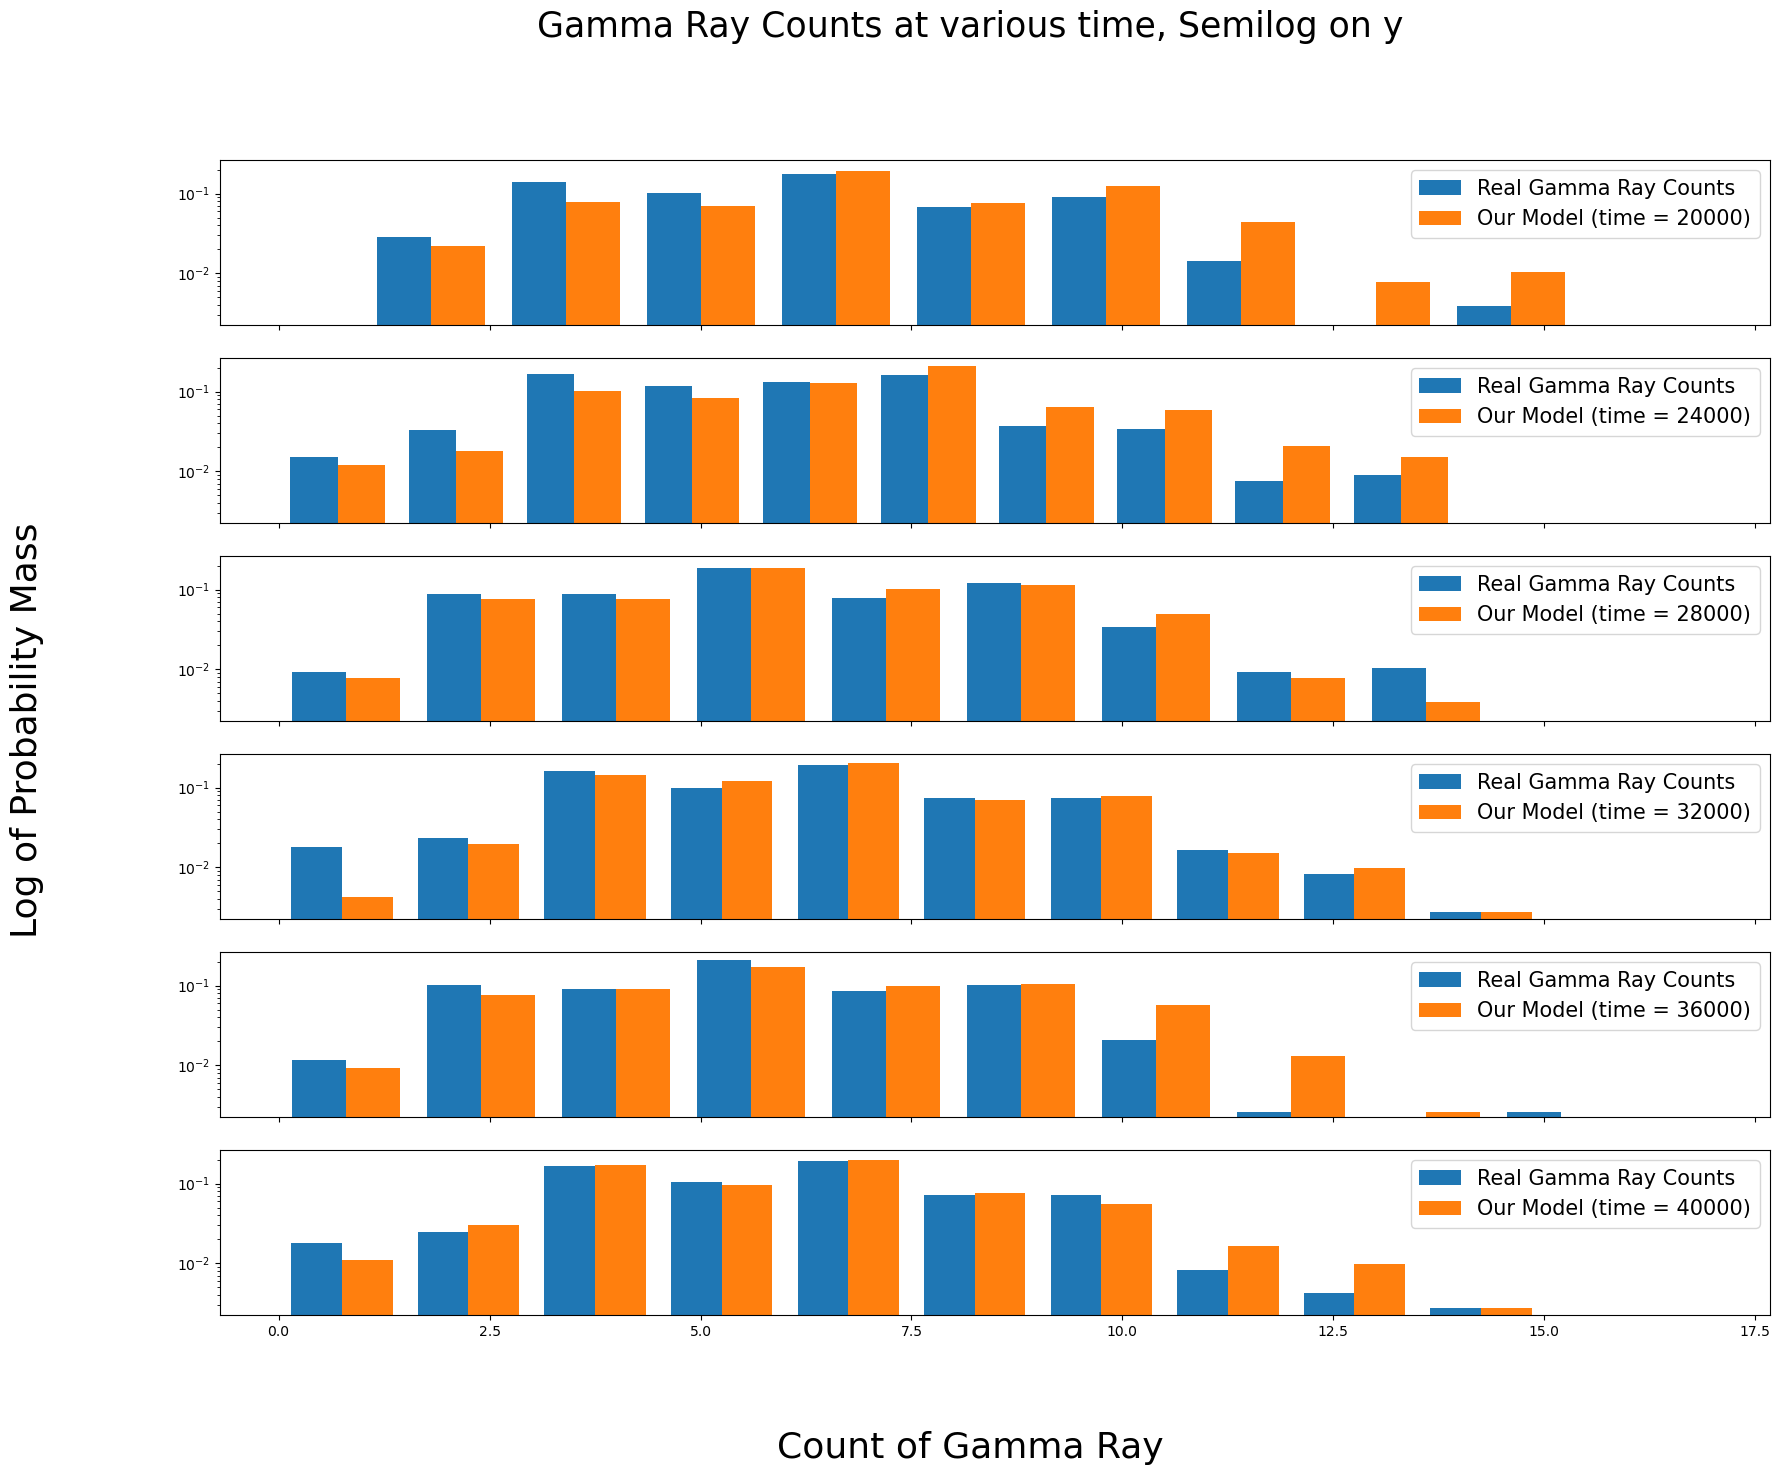

In [18]:
fig, axs = plt.subplots(6,sharex=True, sharey=True)
fig.supylabel('Log of Probability Mass', fontsize=26)    
fig.suptitle('Gamma Ray Counts at various time, Semilog on y', fontsize = 25)
fig.supxlabel('Count of Gamma Ray', fontsize=26)
plt.yscale('log')
for i in range(6):
    mean_value = func(test_time[i], *popt)
    dist = stats.poisson(mean_value) #real poisson distribution
    new_x = list(range(data[3][test_time[i]::period].size))
    vals = dist.rvs(len(new_x))
    axs[i].hist([data[3][test_time[i]:len(data[3]):period], vals], density = True )
    #axs[i].set_title('Gamma Ray Counts at time starting from ' + str(test_time[i]) + ', folded by the period, Log', fontsize = 25
    axs[i].legend(['Real Gamma Ray Counts', 'Our Model (time = ' + str(test_time[i]) + ')'],  prop={"size":15})
plt.show()


Discrepency still exists, especially at the tail of our plots. However, our model fits the real data pretty well for most parts in our plots.

#### **4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?**

Again, we can use the same set values of time to test their corresponding '5-sigma' threshold.

In [19]:
test_time1 = [20000, 24000, 28000, 32000, 36000, 40000]
for value_mean in test_time1:
    threshold = stats.poisson(y_fit[value_mean]).ppf(stats.norm.cdf(5))
    print('Threshold for time at ' + str(value_mean) + ' is ' + str(threshold))

Threshold for time at 20000 is 25.0
Threshold for time at 24000 is 24.0
Threshold for time at 28000 is 24.0
Threshold for time at 32000 is 23.0
Threshold for time at 36000 is 22.0
Threshold for time at 40000 is 22.0


The 5 sigma threshold shifts from 25 to 22 along one period for the points we tested.

## Problem  2

In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

In this lab, we choose to look for a **transient stars.**

#### **1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.**

#### **2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf()**

Let's firstly see what the image looks like:

In [20]:
hf2 = h5py.File('images.h5', 'r')
hf2.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

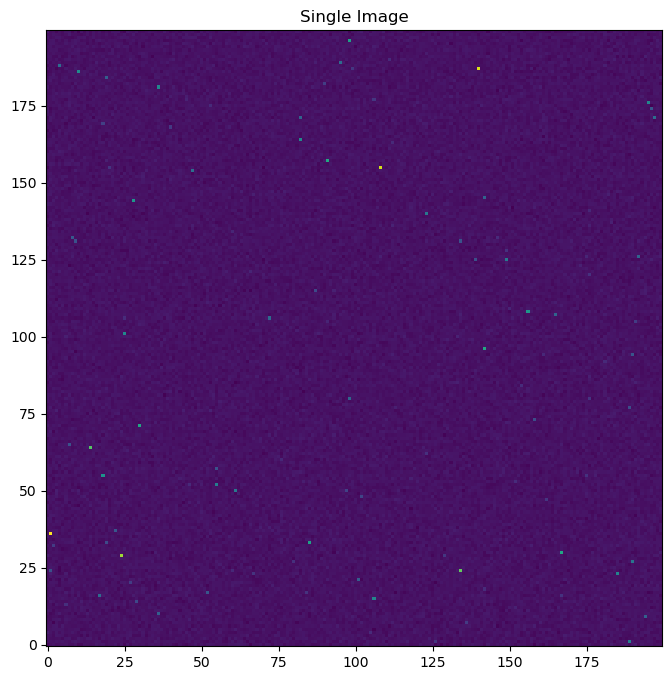

In [21]:
data2 = np.array(hf2.get('image1'))
data3 = np.array(hf2.get('imagestack'))
plt.figure(figsize=(8,8))
plt.title('Single Image')
plt.imshow(data2, origin='lower')

We then plot all the images in our image stacks

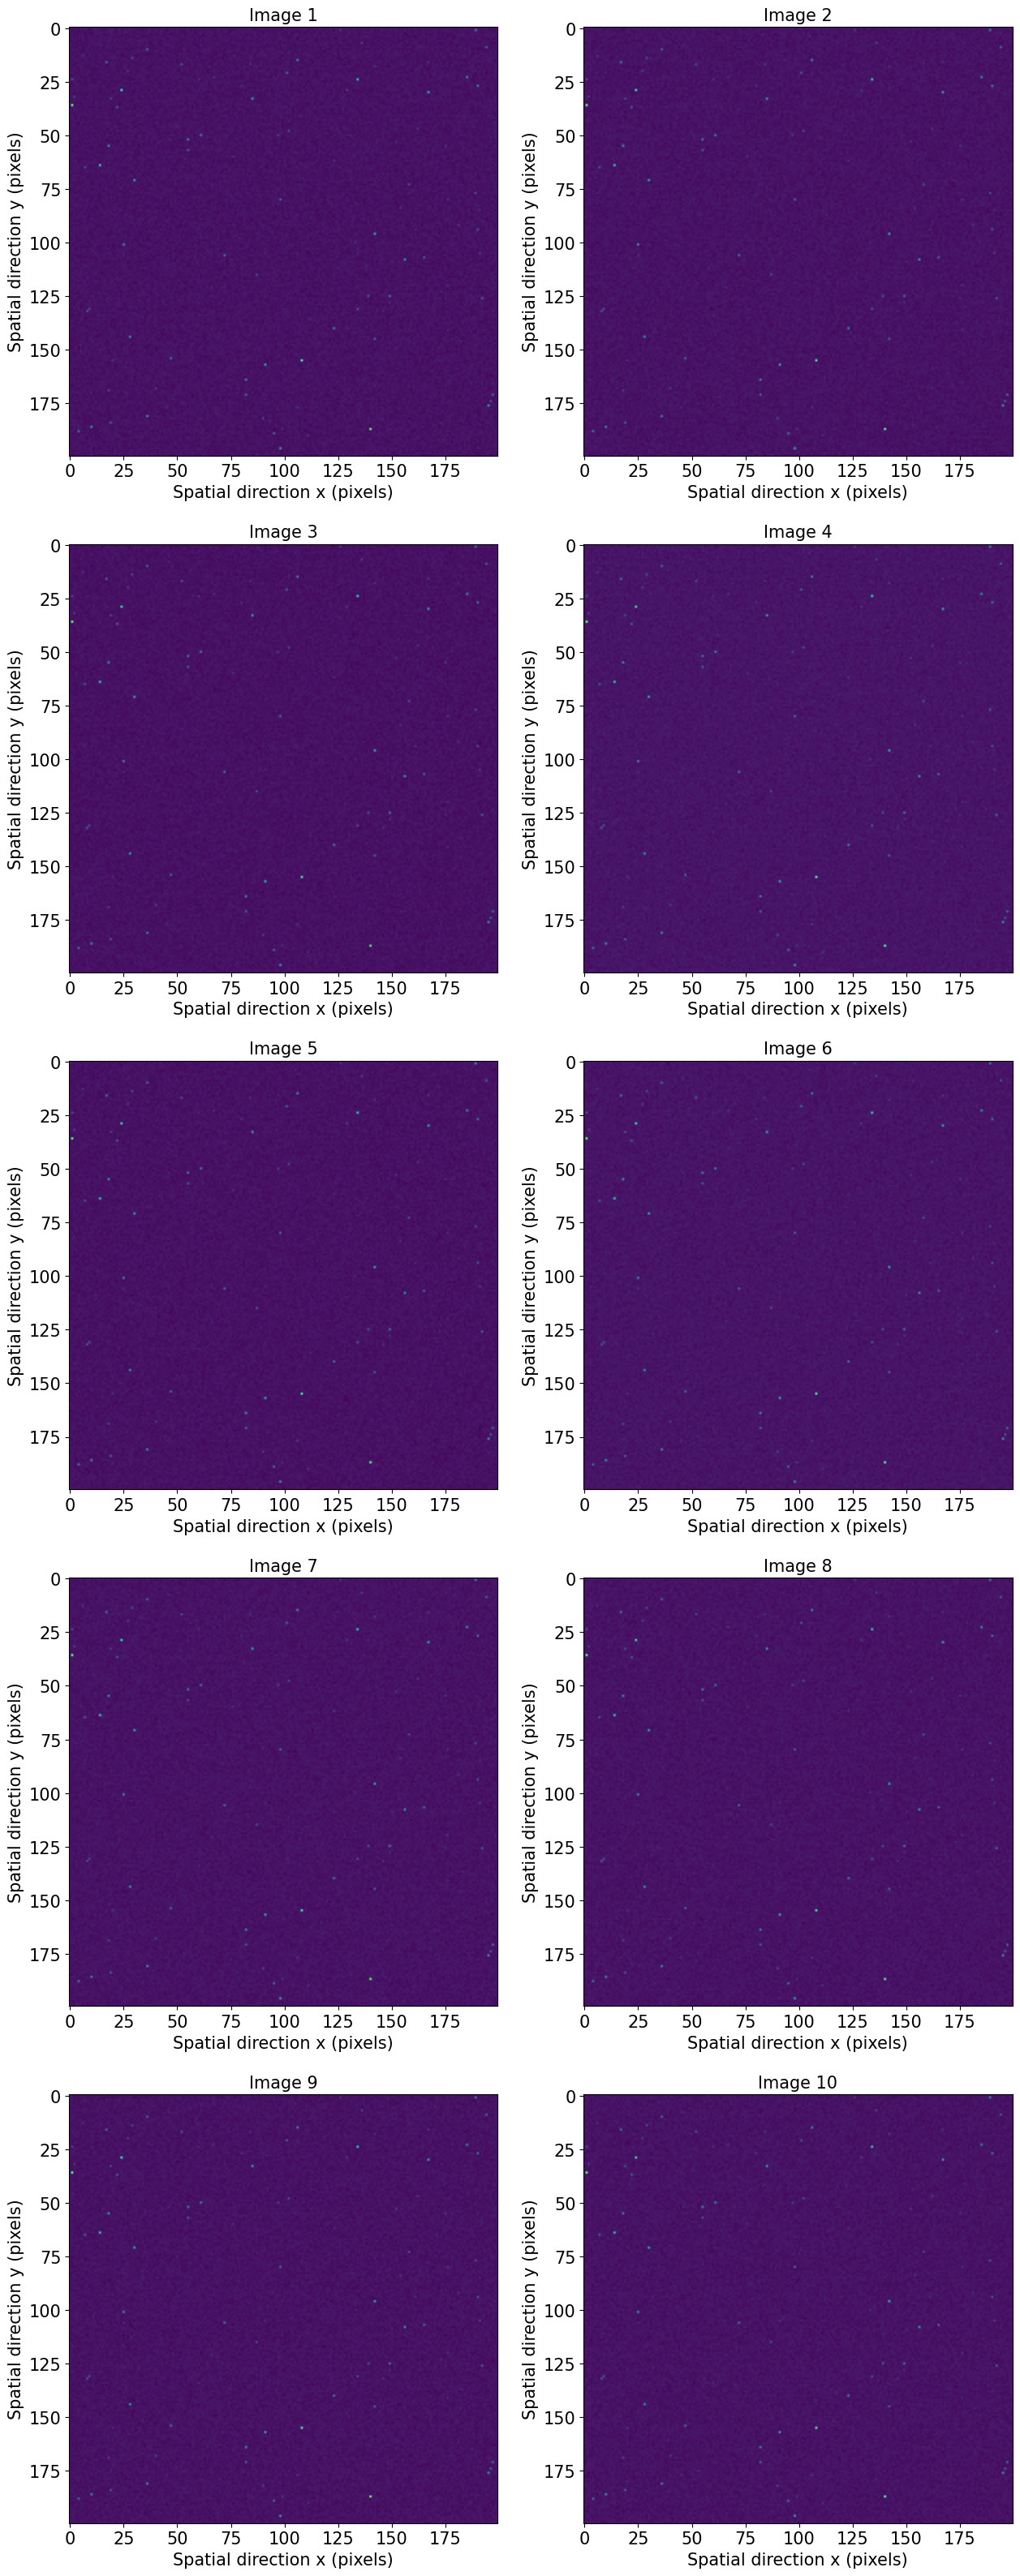

In [22]:
plt.rcParams["figure.figsize"] = (15,40)

for i in range(0, 10):
    plt.subplot(5, 2, i+1)
    plt.title('Image ' + str(i+1), fontsize=15)
    plt.xlabel('Spatial direction x (pixels)', fontsize=15)
    plt.ylabel('Spatial direction y (pixels)', fontsize=15)
    plt.imshow(data3[:,:,i])
    plt.tick_params(labelsize = 15)
plt.show()

Judged from human eyes, there is no obvious change between any pair of the images, and it's very likely to be time-independent. For furthur confirmation, let's find the average intensity of all pixels in each image and compare them.

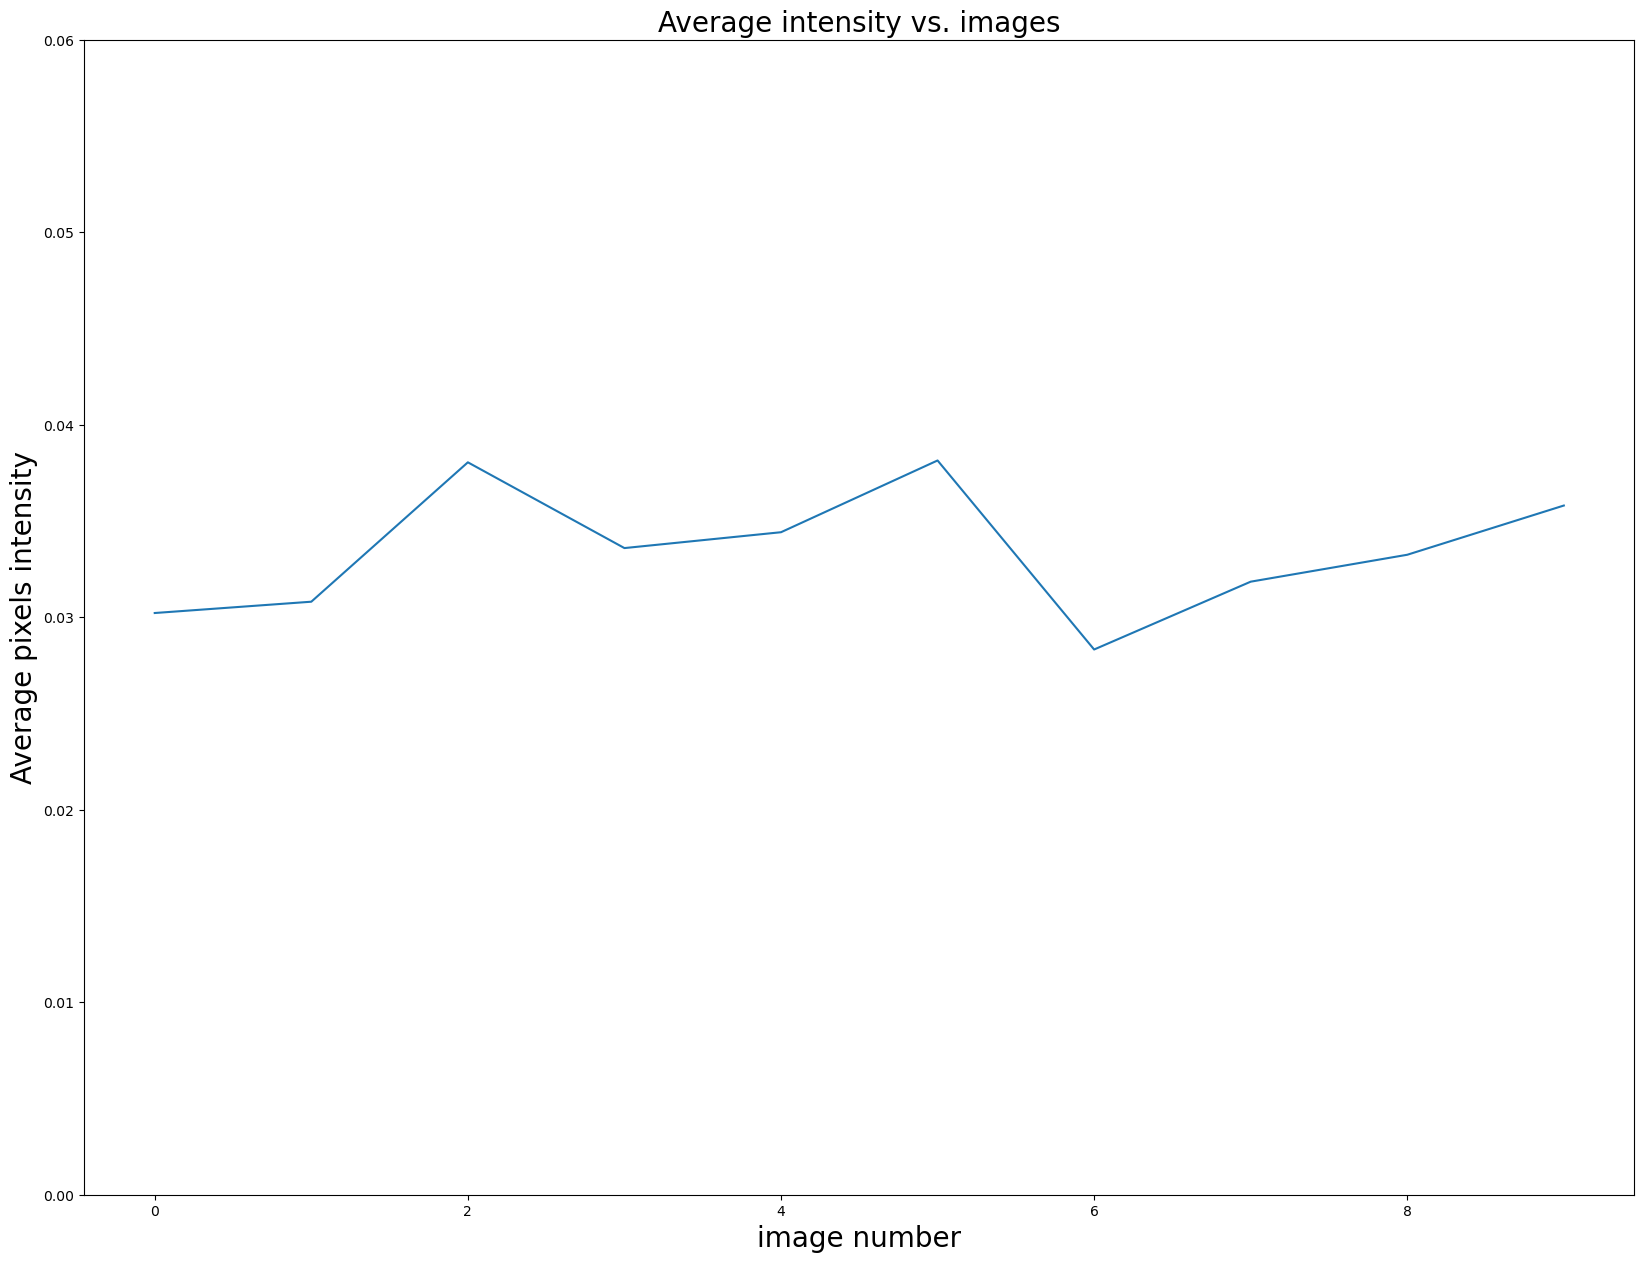

In [23]:
image_num = list(range(10))
plt.rcParams["figure.figsize"] = (20,15)
avg_intensities = []
for i in range(10):
    avg_intensity = data3[:,:,i].sum() / (200 ** 2)
    avg_intensities.append(avg_intensity)
plt.plot(image_num, avg_intensities)
plt.ylim(0, 0.06)
plt.title('Average intensity vs. images', fontsize=20)
plt.xlabel('image number', fontsize=20)
plt.ylabel('Average pixels intensity', fontsize=20)
plt.show()

There are tiny fluctuations existing between images, but the general trend shows the background is time-independent.

As we are looking for the transient star that only appears at one image, we can subtract previous image from the one we are interested in, what we are left with will simply be background noise and potential transient stars (general stars will be eliminated).

In [24]:
diffs= []
for image_num in range(9):
    diff = data3[:,:,image_num+1] - data3[:,:,image_num]
    diffs.append(diff)

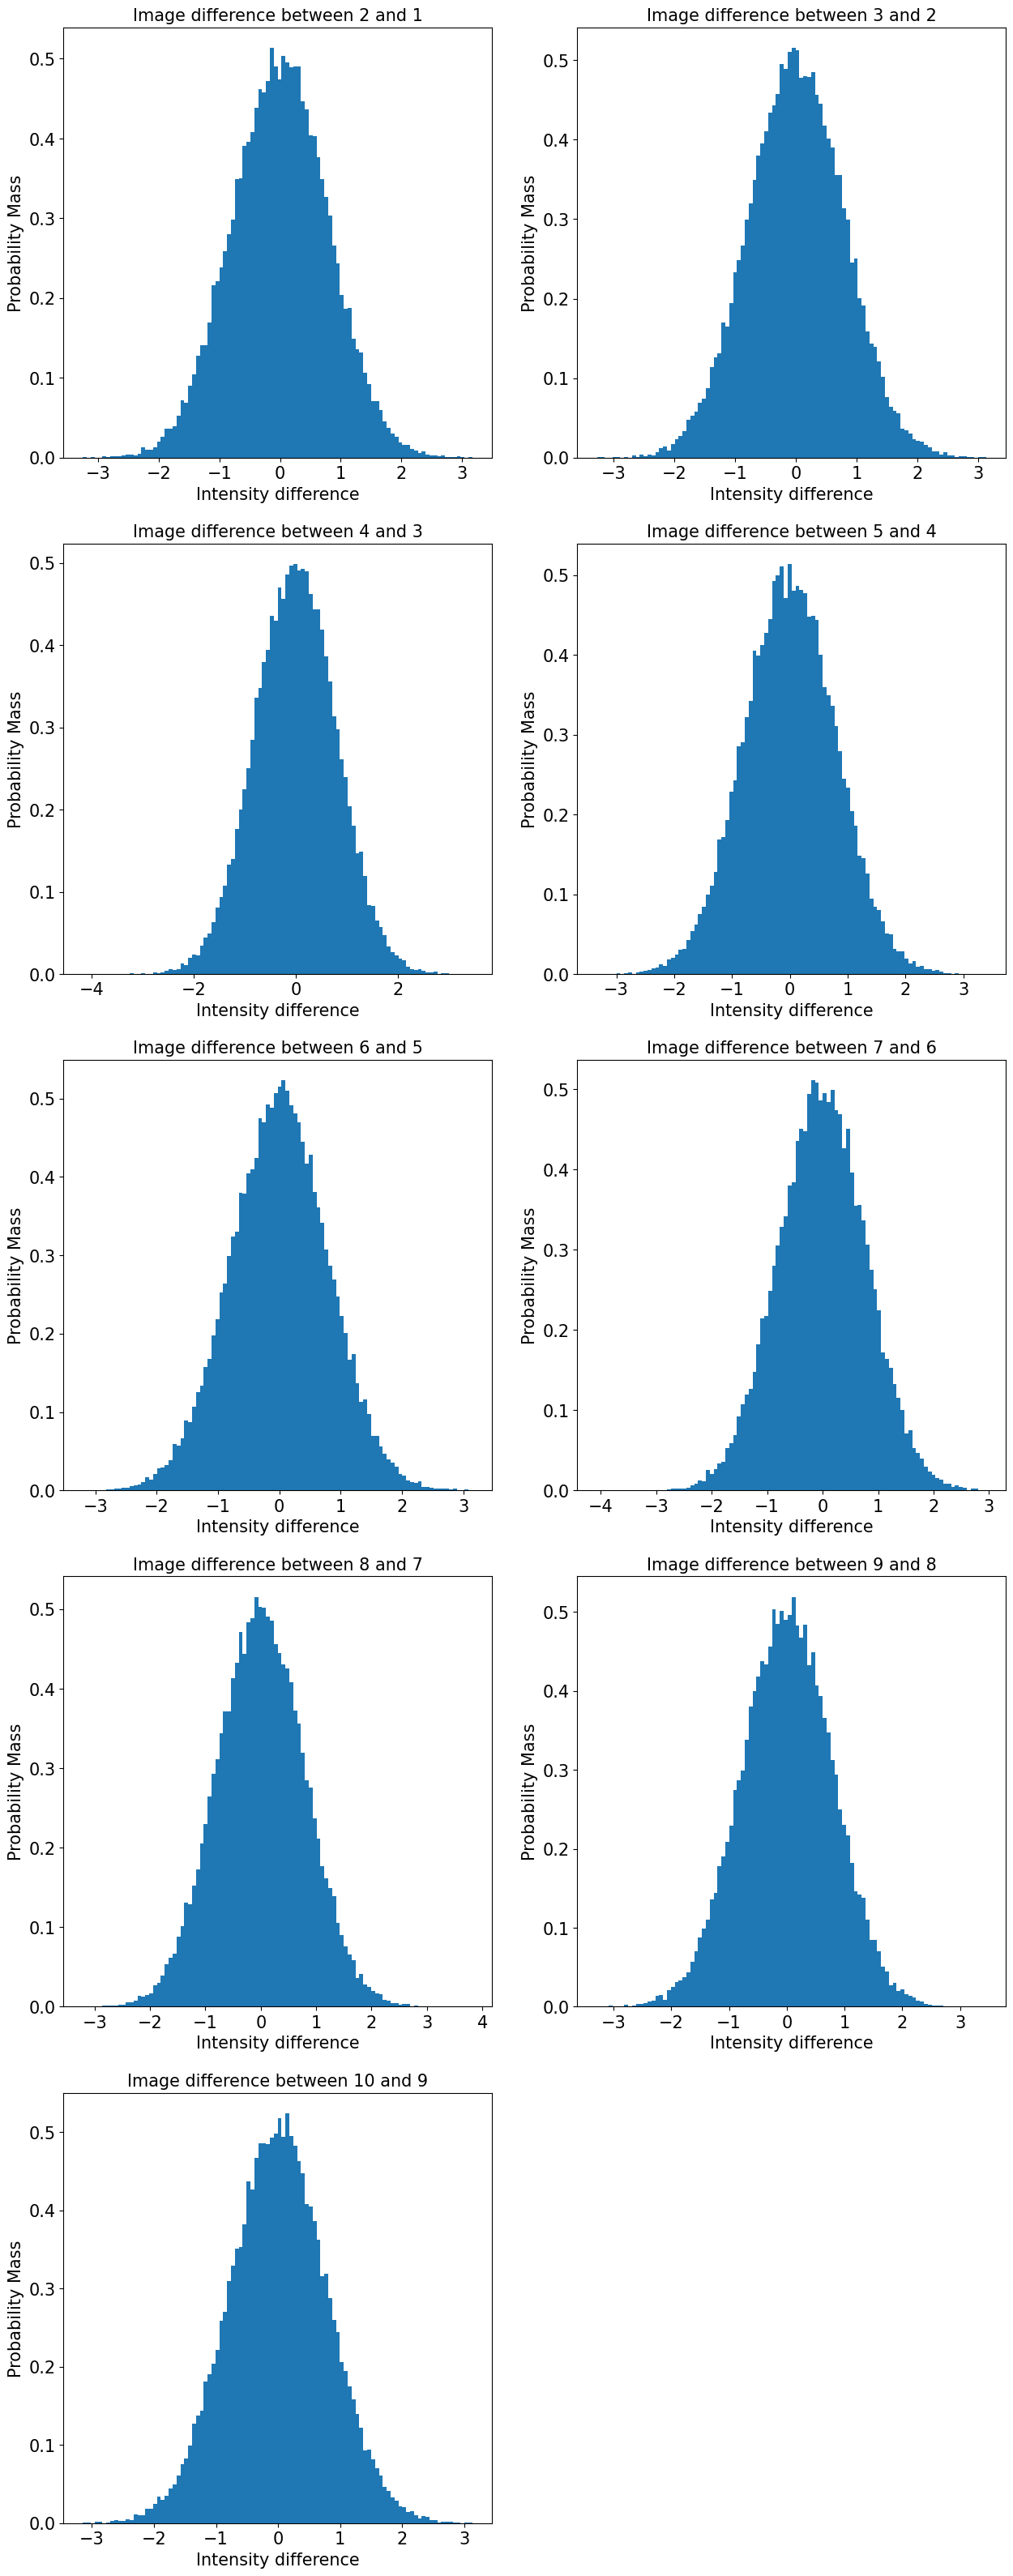

In [25]:
#plt.hist(np.ravel(diffs[2]), bins = 500)
#plt.show()
plt.rcParams["figure.figsize"] = (15,40)
for i in range(9):
    plt.subplot(5, 2, i+1)
    plt.title('Image difference between ' + str(i+2) +' and '+ str(i+1), fontsize=15)
    plt.xlabel('Intensity difference', fontsize=15)
    plt.ylabel('Probability Mass', fontsize=15)
    plt.hist(np.ravel(diffs[i]), bins = 100, density = True)
    plt.tick_params(labelsize = 15)
plt.show()

The difference between consecutive images seems to follow a Gaussian distributions! If the log plots look parabolic, it's more certain that they have Gaussian distributions.

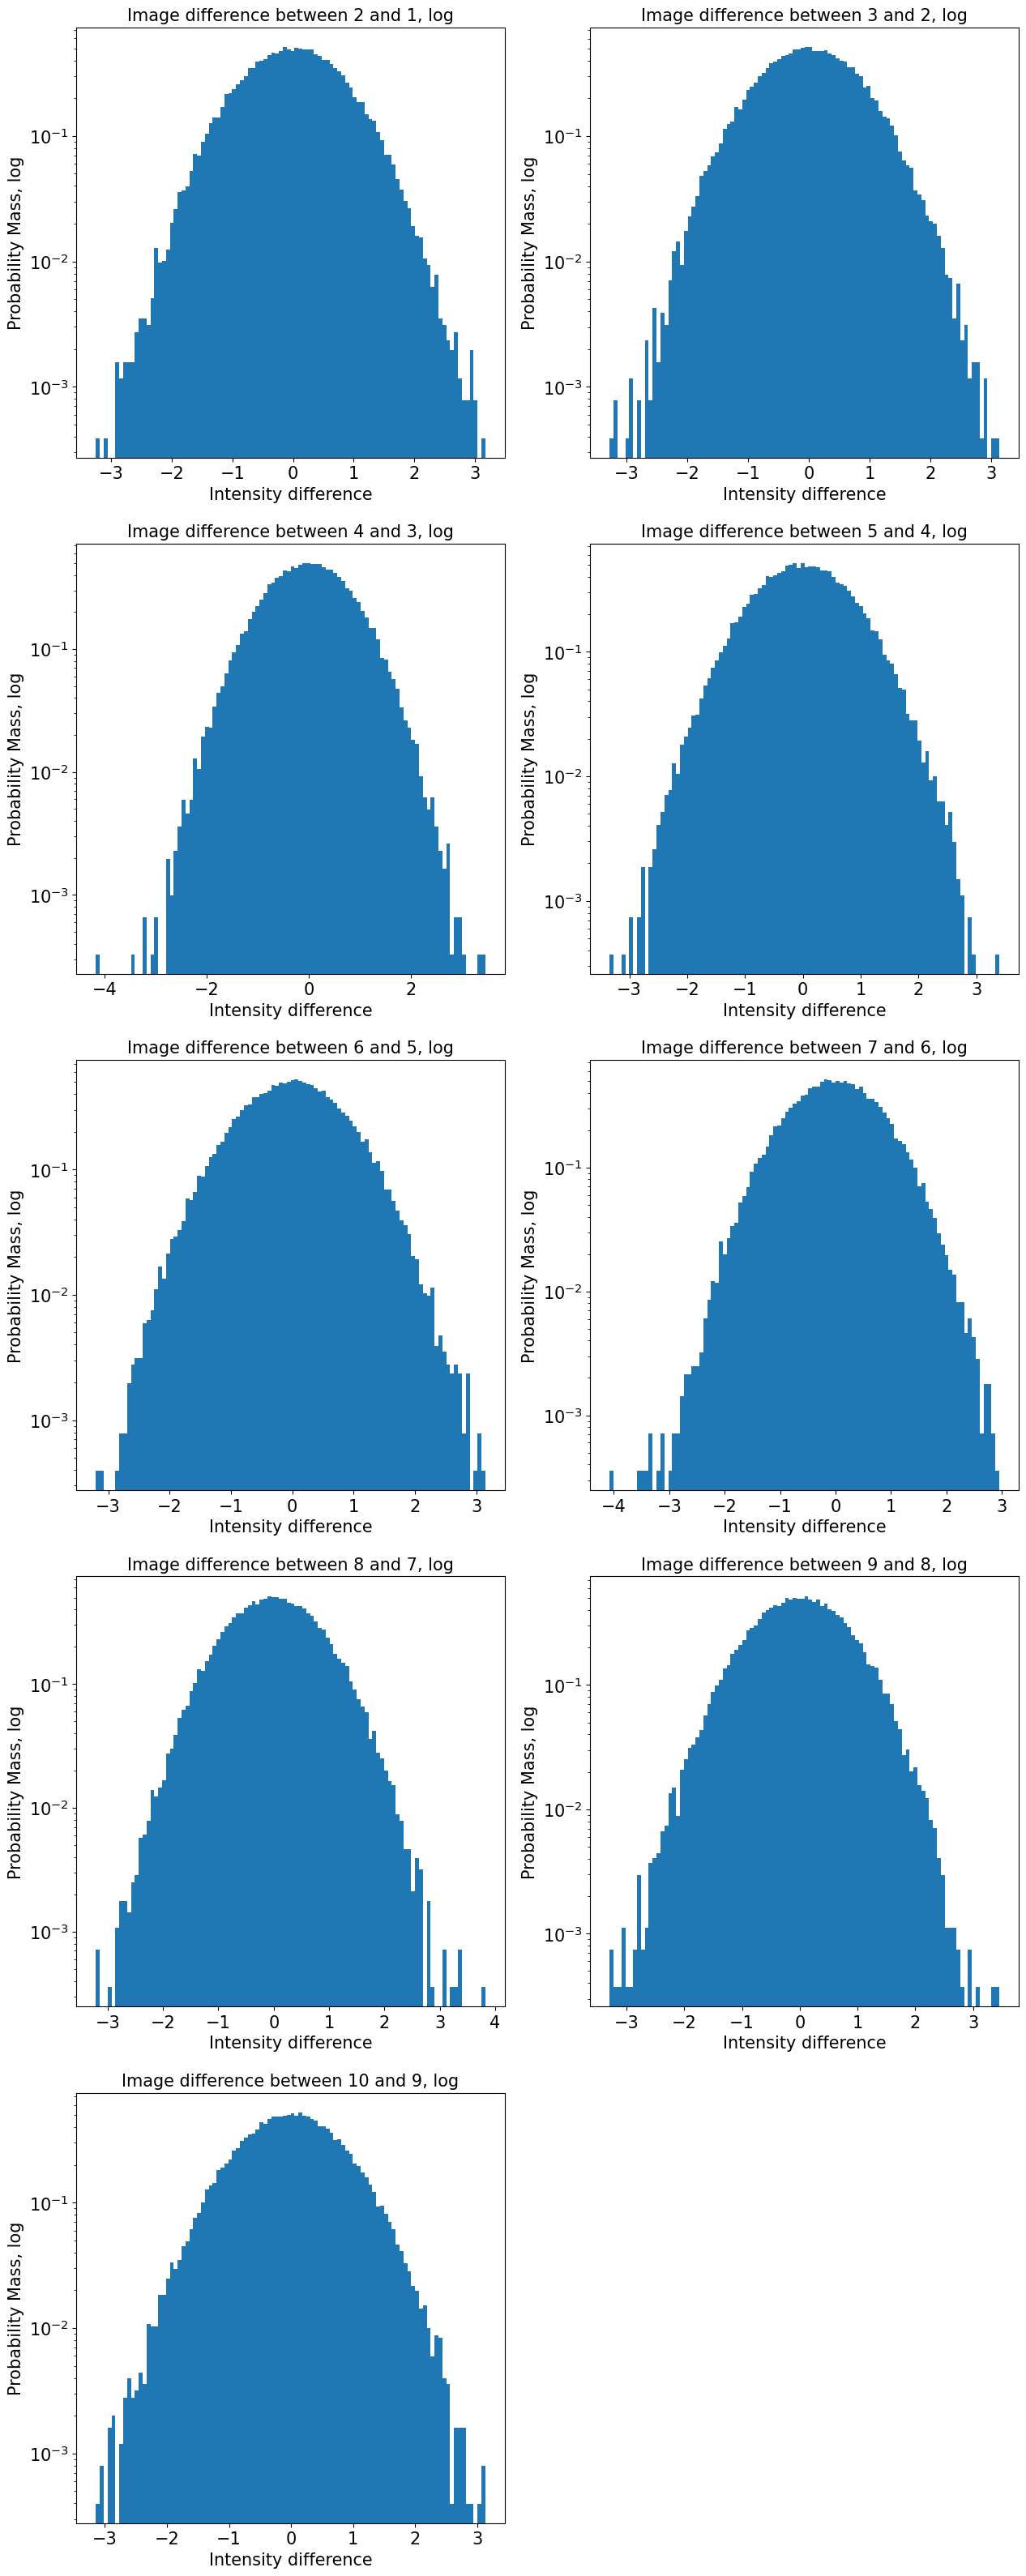

In [26]:
for i in range(9):
    plt.subplot(5, 2, i+1)
    plt.yscale('log')
    plt.title('Image difference between ' + str(i+2) +' and '+ str(i+1) + ', log', fontsize=15)
    plt.xlabel('Intensity difference', fontsize=15)
    plt.ylabel('Probability Mass, log', fontsize=15)
    plt.hist(np.ravel(diffs[i]), bins = 100, density = True)
    plt.tick_params(labelsize = 15)
plt.show()

They are pretty close to be parabolic! We can safely conclude that their PDF follows Gaussian distributions. However, there are few outliars that are only visible on Log plots. Those outliars represent a high intensity difference, which may indicate the existence of transient stars(high brightness)!

Obviously the mean of the distribution locates at around 0, and the standard deviation of the distribution will be found by calculating the standard deviation of our data set.

Let's see how the distribution fits for the image difference between image 2 and 1

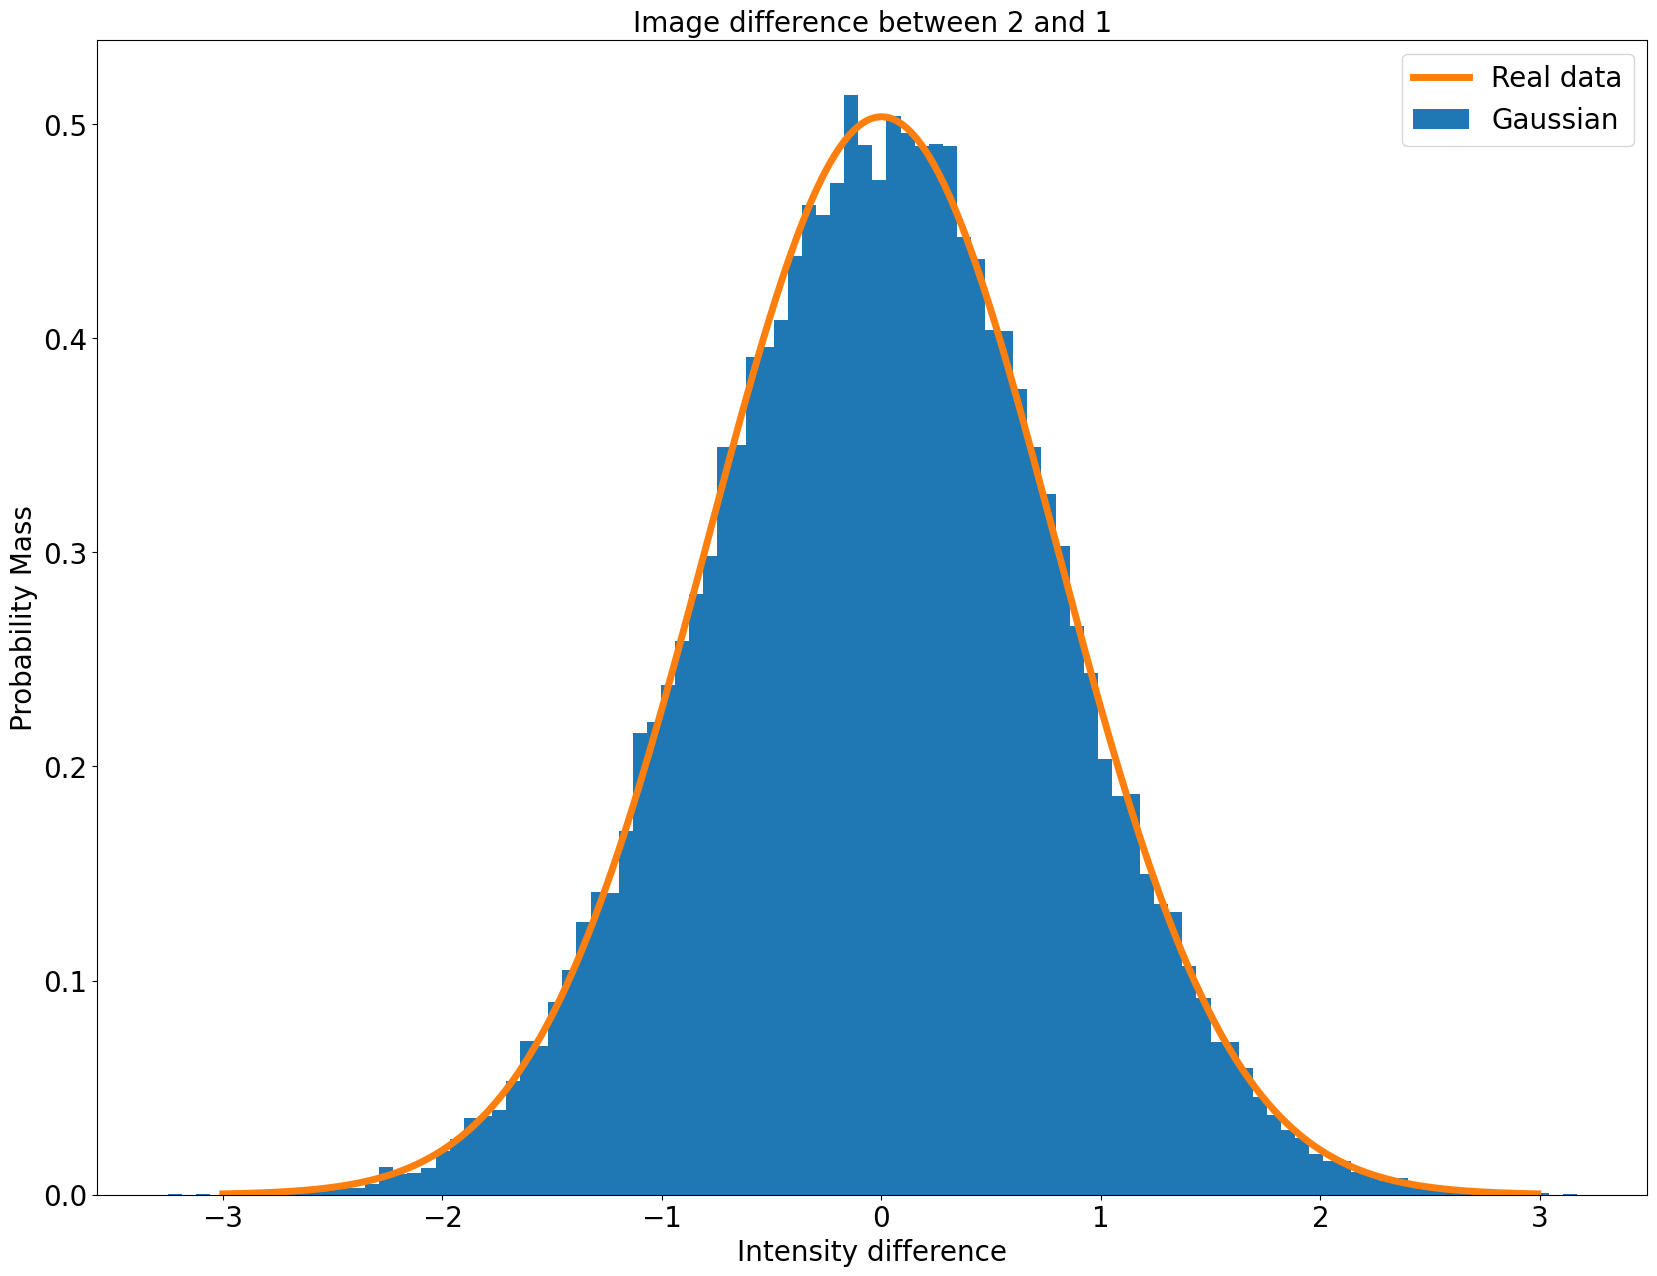

In [27]:
plt.rcParams["figure.figsize"] = (20,15)
x_value = np.arange(-3, 3, 0.01)
mean = np.mean(diffs[0])
SD = np.std(diffs[0])
y = stats.norm(mean, SD)
plt.hist(np.ravel(diffs[0]), bins = 100, density = True)
plt.plot(x_value, y.pdf(x_value), linewidth = 5)
plt.title('Image difference between 2 and 1', fontsize=20)
plt.xlabel('Intensity difference', fontsize=20)
plt.ylabel('Probability Mass', fontsize=20)
plt.legend(['Real data', 'Gaussian'], prop={"size":20})
plt.tick_params(labelsize = 20)
plt.show()

#### **3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.**

From part 2, the background distribution is given by a Gaussian distribution. Now we can hunt for our transient signal based on this distribution. We can set up a threshold in our distribution, and all the data points whose intensity exceeds this threshold will be classified as a transient signal point.

Let's try 5$\sigma$ as our threshold first

In [28]:
prob5sigma = 1 - stats.norm.cdf(5, loc = 0, scale = 1)

In [29]:
thresholds = []
for i in range(9):
    mean = np.mean(diffs[i])
    SD = np.std(diffs[i])
    threshold = stats.norm.ppf(1 - prob5sigma, loc = mean, scale = SD)
    thresholds.append(threshold)
    print('Threshold ' + str(i) + ': '  + str(threshold))

Threshold 0: 3.9632771558701925
Threshold 1: 3.9528030039205837
Threshold 2: 3.9593038517031256
Threshold 3: 3.9732690950111085
Threshold 4: 3.972033474649044
Threshold 5: 3.9620393222651344
Threshold 6: 3.9664764648535984
Threshold 7: 3.9560010871829197
Threshold 8: 3.9699289413523324


Our threshold is around 4 for all the images

Now we look for the number of data points having a value over the threshold.

In [30]:
for i in range(9):
    num_signal = np.count_nonzero(diffs[i] > thresholds[i])
    print('Num of transient in ' + str(i)+': ' + str(num_signal))

Num of transient in 0: 0
Num of transient in 1: 0
Num of transient in 2: 0
Num of transient in 3: 0
Num of transient in 4: 0
Num of transient in 5: 0
Num of transient in 6: 0
Num of transient in 7: 0
Num of transient in 8: 0


Looks like 5$\sigma$ is too high as our threshold in this case, as it excludes all the data points.

Let's try 4$\sigma$ as our threshold.

In [31]:
prob4sigma = 1 - stats.norm.cdf(4, loc = 0, scale = 1)
thresholds = []
for i in range(9):
    mean = np.mean(diffs[i])
    SD = np.std(diffs[i])
    threshold = stats.norm.ppf(1 - prob4sigma, loc = mean, scale = SD)
    thresholds.append(threshold)
    print('Threshold ' + str(i) + ': '  + str(threshold))
for i in range(9):
    num_signal = np.count_nonzero(diffs[i] > thresholds[i])
    print('Num of transient in ' + str(i)+': ' + str(num_signal))

Threshold 0: 3.1707391846344666
Threshold 1: 3.163690605341397
Threshold 2: 3.166552080203566
Threshold 3: 3.1787799997342057
Threshold 4: 3.178372217368211
Threshold 5: 3.167667497984472
Threshold 6: 3.173885914805782
Threshold 7: 3.165080558211638
Threshold 8: 3.176454505630429
Num of transient in 0: 0
Num of transient in 1: 0
Num of transient in 2: 2
Num of transient in 3: 1
Num of transient in 4: 0
Num of transient in 5: 0
Num of transient in 6: 5
Num of transient in 7: 2
Num of transient in 8: 0


Using 4$\sigma$ as threshold, we got 2+1+5+2 = 10 data points that can be classified as transient stars!

#### **4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.**

Although we are manipulating the same data sets, our goals are different, which need different methods to deal with the data sets. For my partner who is interested in finding the faintest stars, he might need to find the average of all the images to singularize the dim pixels. For my case, we look into the difference between each consectuive pair of images. Those two methods will surely give us different results for our pdf

In [32]:
!jupyter nbconvert --to html Lab4_notebook.ipynb

[NbConvertApp] Converting notebook Lab4_notebook.ipynb to html
[NbConvertApp] Writing 6526263 bytes to Lab4_notebook.html
